In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data1 = pd.read_csv('/content/drive/MyDrive/code/code/dindang/dataAir_dindang.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data1

date  pm10   co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   NaN  NaN    NaN   NaN    NaN   NaN  27.1     70   
1    2018-01-02   NaN  NaN    NaN   NaN    NaN   NaN  27.5     67   
2    2018-01-03   NaN  NaN    NaN   NaN    NaN   NaN  28.2     66   
3    2018-01-04   NaN  NaN    NaN   NaN    NaN   NaN  29.3     64   
4    2018-01-05   NaN  NaN    NaN   NaN    NaN   NaN  30.4     63   
...         ...   ...  ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27  46.0  0.5  25.33  20.4  45.73  16.0  28.5     79   
1761 2022-10-28  55.0  0.6  41.57  25.2  66.77  19.0  29.6     72   
1762 2022-10-29  57.0  0.5  21.73  24.7  46.45  20.0  29.5     62   
1763 2022-10-30  80.0  0.9  35.39  38.3  73.66  32.0  30.0     62   
1764 2022-10-31  80.0  0.7  17.77  34.1  51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1698 non-null   float64       
 2   co                1714 non-null   float64       
 3   no                1713 non-null   float64       
 4   no2               1713 non-null   float64       
 5   nox               1712 non-null   float64       
 6   pm25              1028 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [7]:
data2=data1.sort_values('date').reset_index(drop=True).copy()
data2

date  pm10   co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   NaN  NaN    NaN   NaN    NaN   NaN  27.1     70   
1    2018-01-02   NaN  NaN    NaN   NaN    NaN   NaN  27.5     67   
2    2018-01-03   NaN  NaN    NaN   NaN    NaN   NaN  28.2     66   
3    2018-01-04   NaN  NaN    NaN   NaN    NaN   NaN  29.3     64   
4    2018-01-05   NaN  NaN    NaN   NaN    NaN   NaN  30.4     63   
...         ...   ...  ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27  46.0  0.5  25.33  20.4  45.73  16.0  28.5     79   
1761 2022-10-28  55.0  0.6  41.57  25.2  66.77  19.0  29.6     72   
1762 2022-10-29  57.0  0.5  21.73  24.7  46.45  20.0  29.5     62   
1763 2022-10-30  80.0  0.9  35.39  38.3  73.66  32.0  30.0     62   
1764 2022-10-31  80.0  0.7  17.77  34.1  51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [8]:
y_col='pm25'

In [9]:
data2.dropna(subset=[y_col], inplace=True)
data2=data2.reset_index(drop=True)
data2

date   pm10    co     no    no2     nox  pm25  avgT  humid  \
0    2020-01-07  140.0  1.09  21.66  34.04   55.70  33.0  30.8     63   
1    2020-01-08  118.0  0.93  26.20  31.36   57.55  47.0  30.5     69   
2    2020-01-09  137.0  1.37  73.71  42.93  116.34  49.0  30.8     68   
3    2020-01-10  183.0  1.45  57.53  55.32  112.85  80.0  30.6     69   
4    2020-01-11  123.0  0.67   6.79  26.72   33.51  43.0  29.8     80   
...         ...    ...   ...    ...    ...     ...   ...   ...    ...   
1023 2022-10-27   46.0  0.50  25.33  20.40   45.73  16.0  28.5     79   
1024 2022-10-28   55.0  0.60  41.57  25.20   66.77  19.0  29.6     72   
1025 2022-10-29   57.0  0.50  21.73  24.70   46.45  20.0  29.5     62   
1026 2022-10-30   80.0  0.90  35.39  38.30   73.66  32.0  30.0     62   
1027 2022-10-31   80.0  0.70  17.77  34.10   51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1011.12    110.0      6.0  
1              1011.12    120.0      9.0  
2              1011.12    240.0      8.0  
3              1011.12    120.0      8.0  
4              1011.12    160.0     14.0  
...                ...      ...      ...  
1023           1009.24    120.0      9.0  
1024           1009.24    170.0      7.0  
1025           1009.24    120.0     13.0  
1026           1009.24    120.0     13.0  
1027           1009.24      NaN      NaN  

[1028 rows x 12 columns]

In [10]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [11]:
date_parts(data2)

In [12]:
data2

date   pm10    co     no    no2     nox  pm25  avgT  humid  \
0    2020-01-07  140.0  1.09  21.66  34.04   55.70  33.0  30.8     63   
1    2020-01-08  118.0  0.93  26.20  31.36   57.55  47.0  30.5     69   
2    2020-01-09  137.0  1.37  73.71  42.93  116.34  49.0  30.8     68   
3    2020-01-10  183.0  1.45  57.53  55.32  112.85  80.0  30.6     69   
4    2020-01-11  123.0  0.67   6.79  26.72   33.51  43.0  29.8     80   
...         ...    ...   ...    ...    ...     ...   ...   ...    ...   
1023 2022-10-27   46.0  0.50  25.33  20.40   45.73  16.0  28.5     79   
1024 2022-10-28   55.0  0.60  41.57  25.20   66.77  19.0  29.6     72   
1025 2022-10-29   57.0  0.50  21.73  24.70   46.45  20.0  29.5     62   
1026 2022-10-30   80.0  0.90  35.39  38.30   73.66  32.0  30.0     62   
1027 2022-10-31   80.0  0.70  17.77  34.10   51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  year  month  day   day_name  
0              1011.12    110.0      6.0  2020      1    7    Tuesday  
1              1011.12    120.0      9.0  2020      1    8  Wednesday  
2              1011.12    240.0      8.0  2020      1    9   Thursday  
3              1011.12    120.0      8.0  2020      1   10     Friday  
4              1011.12    160.0     14.0  2020      1   11   Saturday  
...                ...      ...      ...   ...    ...  ...        ...  
1023           1009.24    120.0      9.0  2022     10   27   Thursday  
1024           1009.24    170.0      7.0  2022     10   28     Friday  
1025           1009.24    120.0     13.0  2022     10   29   Saturday  
1026           1009.24    120.0     13.0  2022     10   30     Sunday  
1027           1009.24      NaN      NaN  2022     10   31     Monday  

[1028 rows x 16 columns]

In [13]:
data2.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [14]:
df1=data2[['date', 'year', 'month', 'day', 'day_name', y_col]]
df1

date  year  month  day   day_name  pm25
0    2020-01-07  2020      1    7    Tuesday  33.0
1    2020-01-08  2020      1    8  Wednesday  47.0
2    2020-01-09  2020      1    9   Thursday  49.0
3    2020-01-10  2020      1   10     Friday  80.0
4    2020-01-11  2020      1   11   Saturday  43.0
...         ...   ...    ...  ...        ...   ...
1023 2022-10-27  2022     10   27   Thursday  16.0
1024 2022-10-28  2022     10   28     Friday  19.0
1025 2022-10-29  2022     10   29   Saturday  20.0
1026 2022-10-30  2022     10   30     Sunday  32.0
1027 2022-10-31  2022     10   31     Monday  39.0

[1028 rows x 6 columns]

In [15]:
df1=df1.set_index('date')
df1

year  month  day   day_name  pm25
date                                         
2020-01-07  2020      1    7    Tuesday  33.0
2020-01-08  2020      1    8  Wednesday  47.0
2020-01-09  2020      1    9   Thursday  49.0
2020-01-10  2020      1   10     Friday  80.0
2020-01-11  2020      1   11   Saturday  43.0
...          ...    ...  ...        ...   ...
2022-10-27  2022     10   27   Thursday  16.0
2022-10-28  2022     10   28     Friday  19.0
2022-10-29  2022     10   29   Saturday  20.0
2022-10-30  2022     10   30     Sunday  32.0
2022-10-31  2022     10   31     Monday  39.0

[1028 rows x 5 columns]

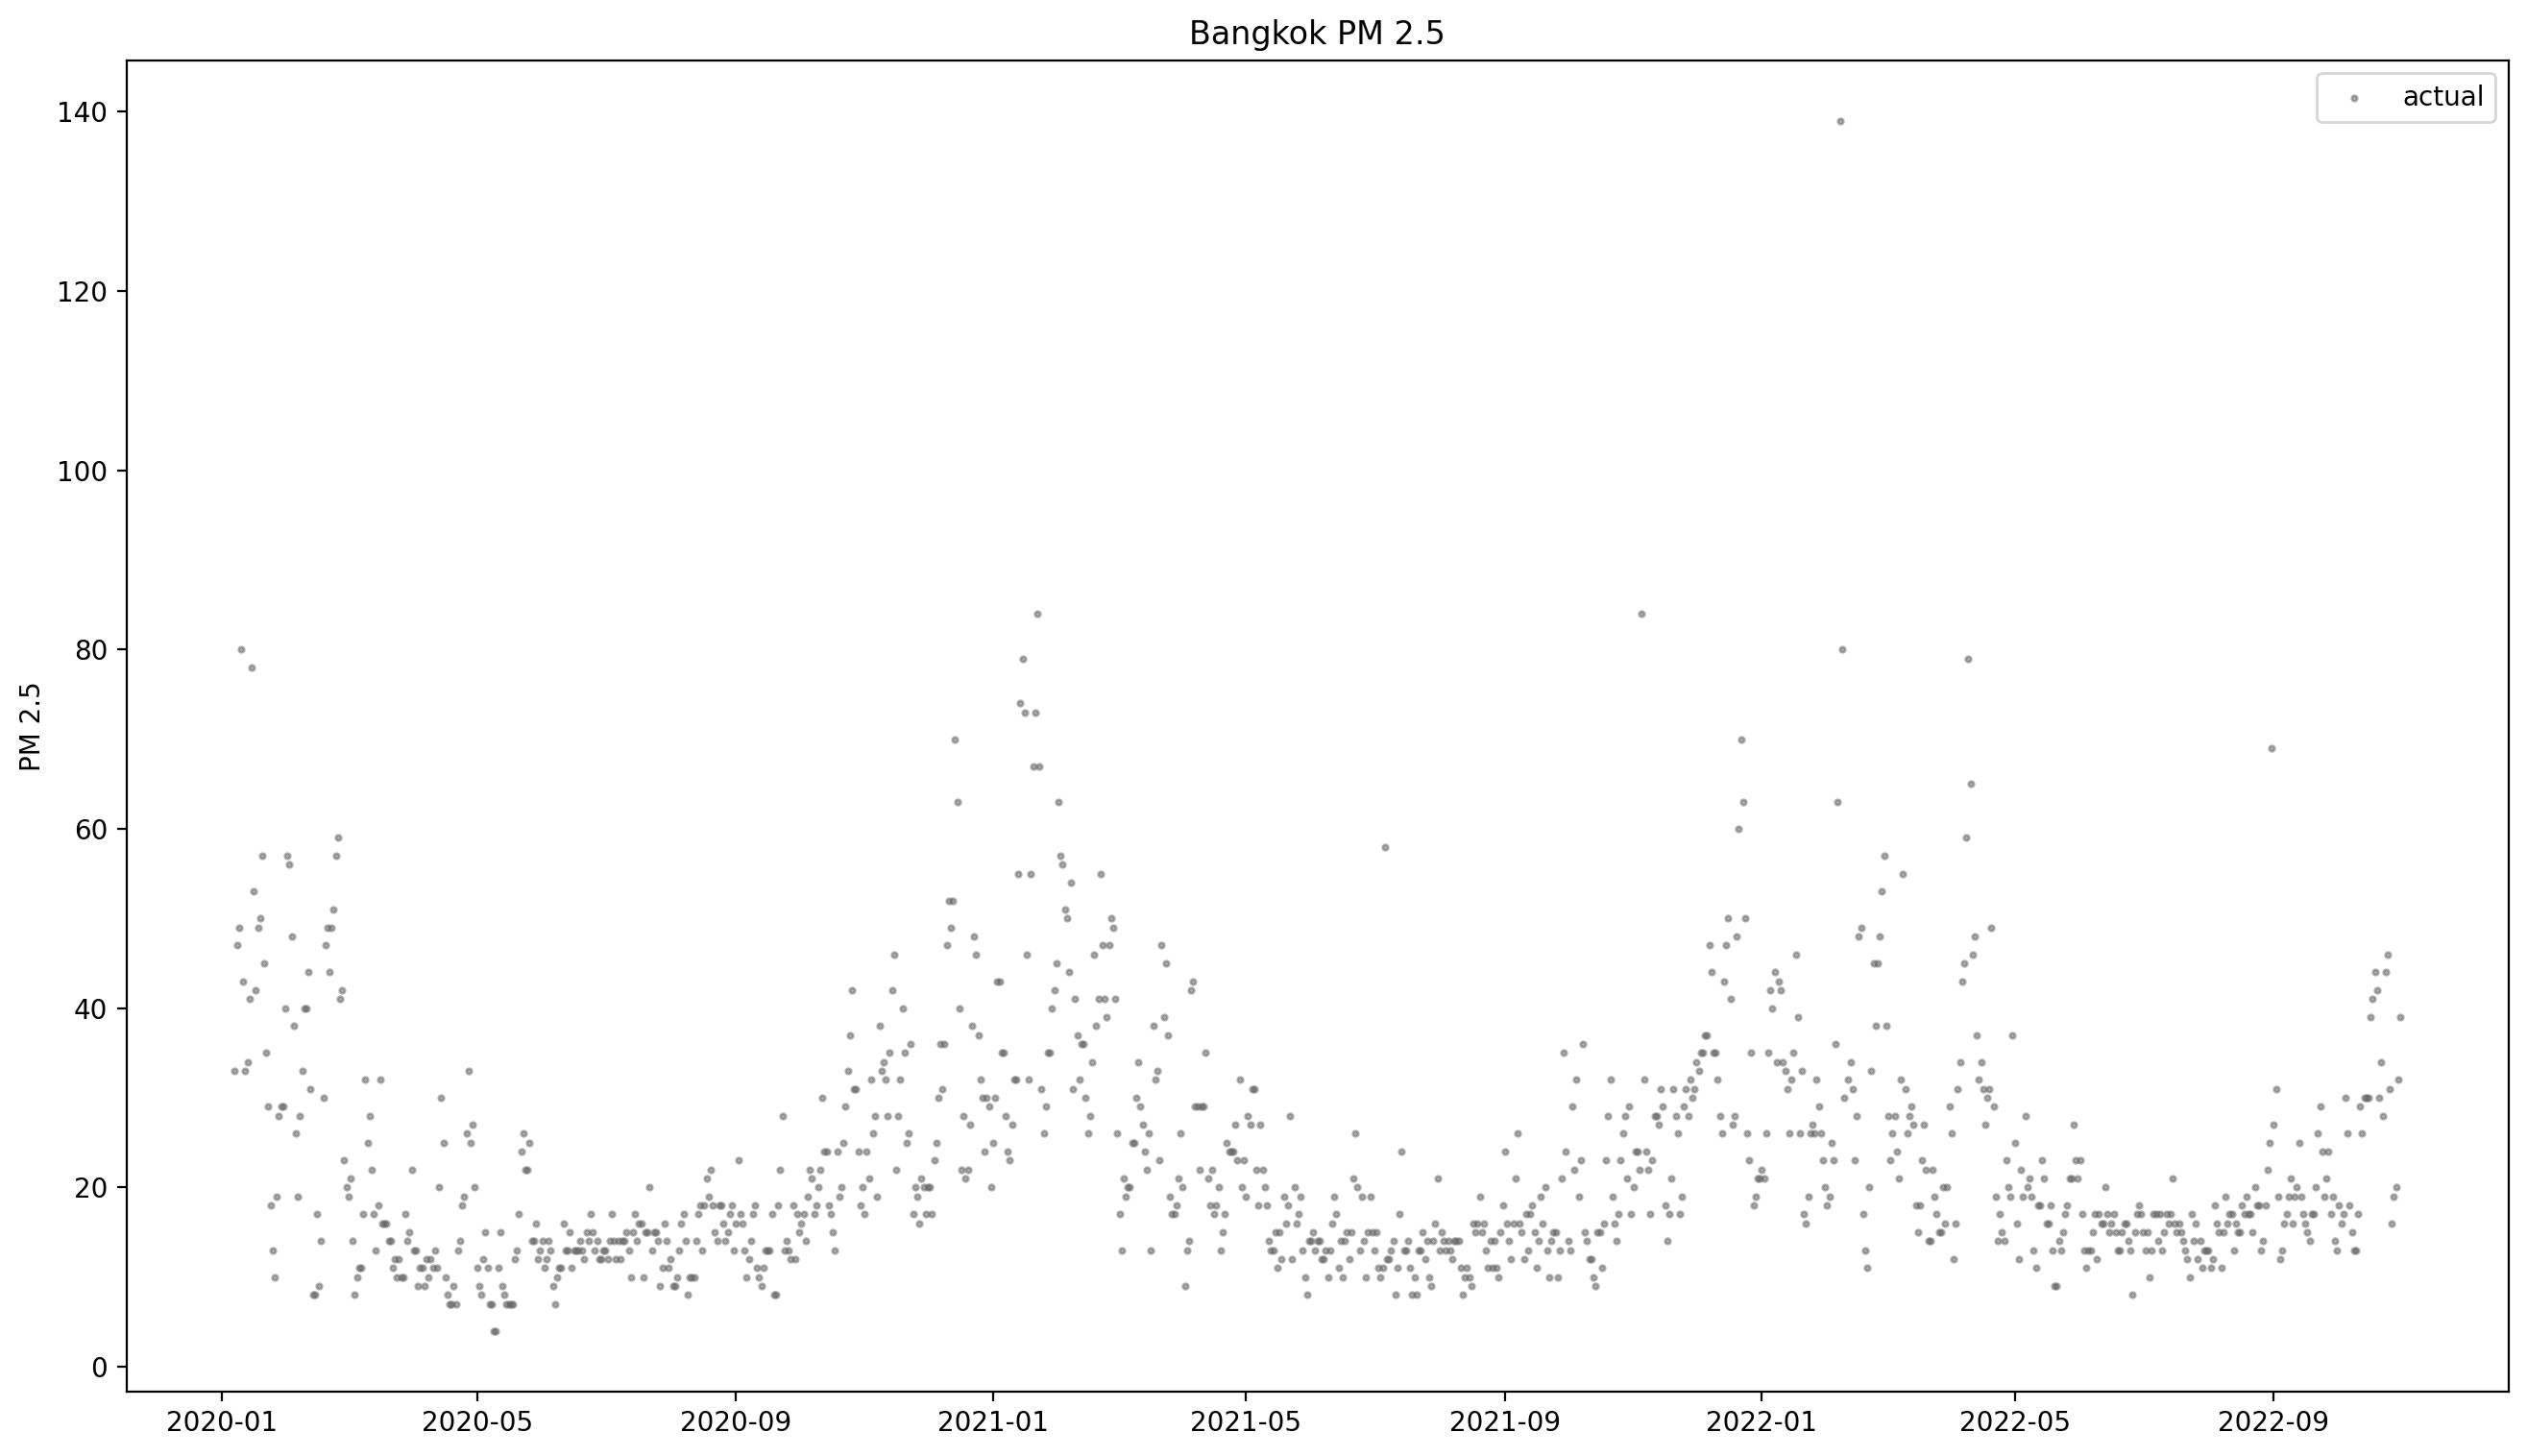

In [16]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [17]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df1[feature_cols]
y=df1[y_col]

In [18]:
split_at = 900
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [19]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [20]:
light_reg = lgb.LGBMRegressor()

In [21]:
light_reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [22]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [23]:
fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
light_reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 62.457
[20]	valid_0's l2: 64.9293
[30]	valid_0's l2: 66.3515
[40]	valid_0's l2: 69.6356
[50]	valid_0's l2: 73.4391
[60]	valid_0's l2: 74.9165
[70]	valid_0's l2: 77.417
[80]	valid_0's l2: 78.8521
[90]	valid_0's l2: 79.0893
[100]	valid_0's l2: 79.6582


LGBMRegressor()

In [24]:
light_reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7f2e2204fd90>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [84.73655040393349,
                 78.30878034336686,
                 73.41681061829001,
                 69.58176264743535,
                 66.89422705564517,
                 64.92770849069751,
                 63.44847740825552,
                 62.52051405506623,
                 62.361841516651246,
                 62.4569635754905,
                 62.14939161443806,
                 62.51430687555847,
                 62.5586131830404

In [25]:
light_pred = light_reg.predict(X_test)

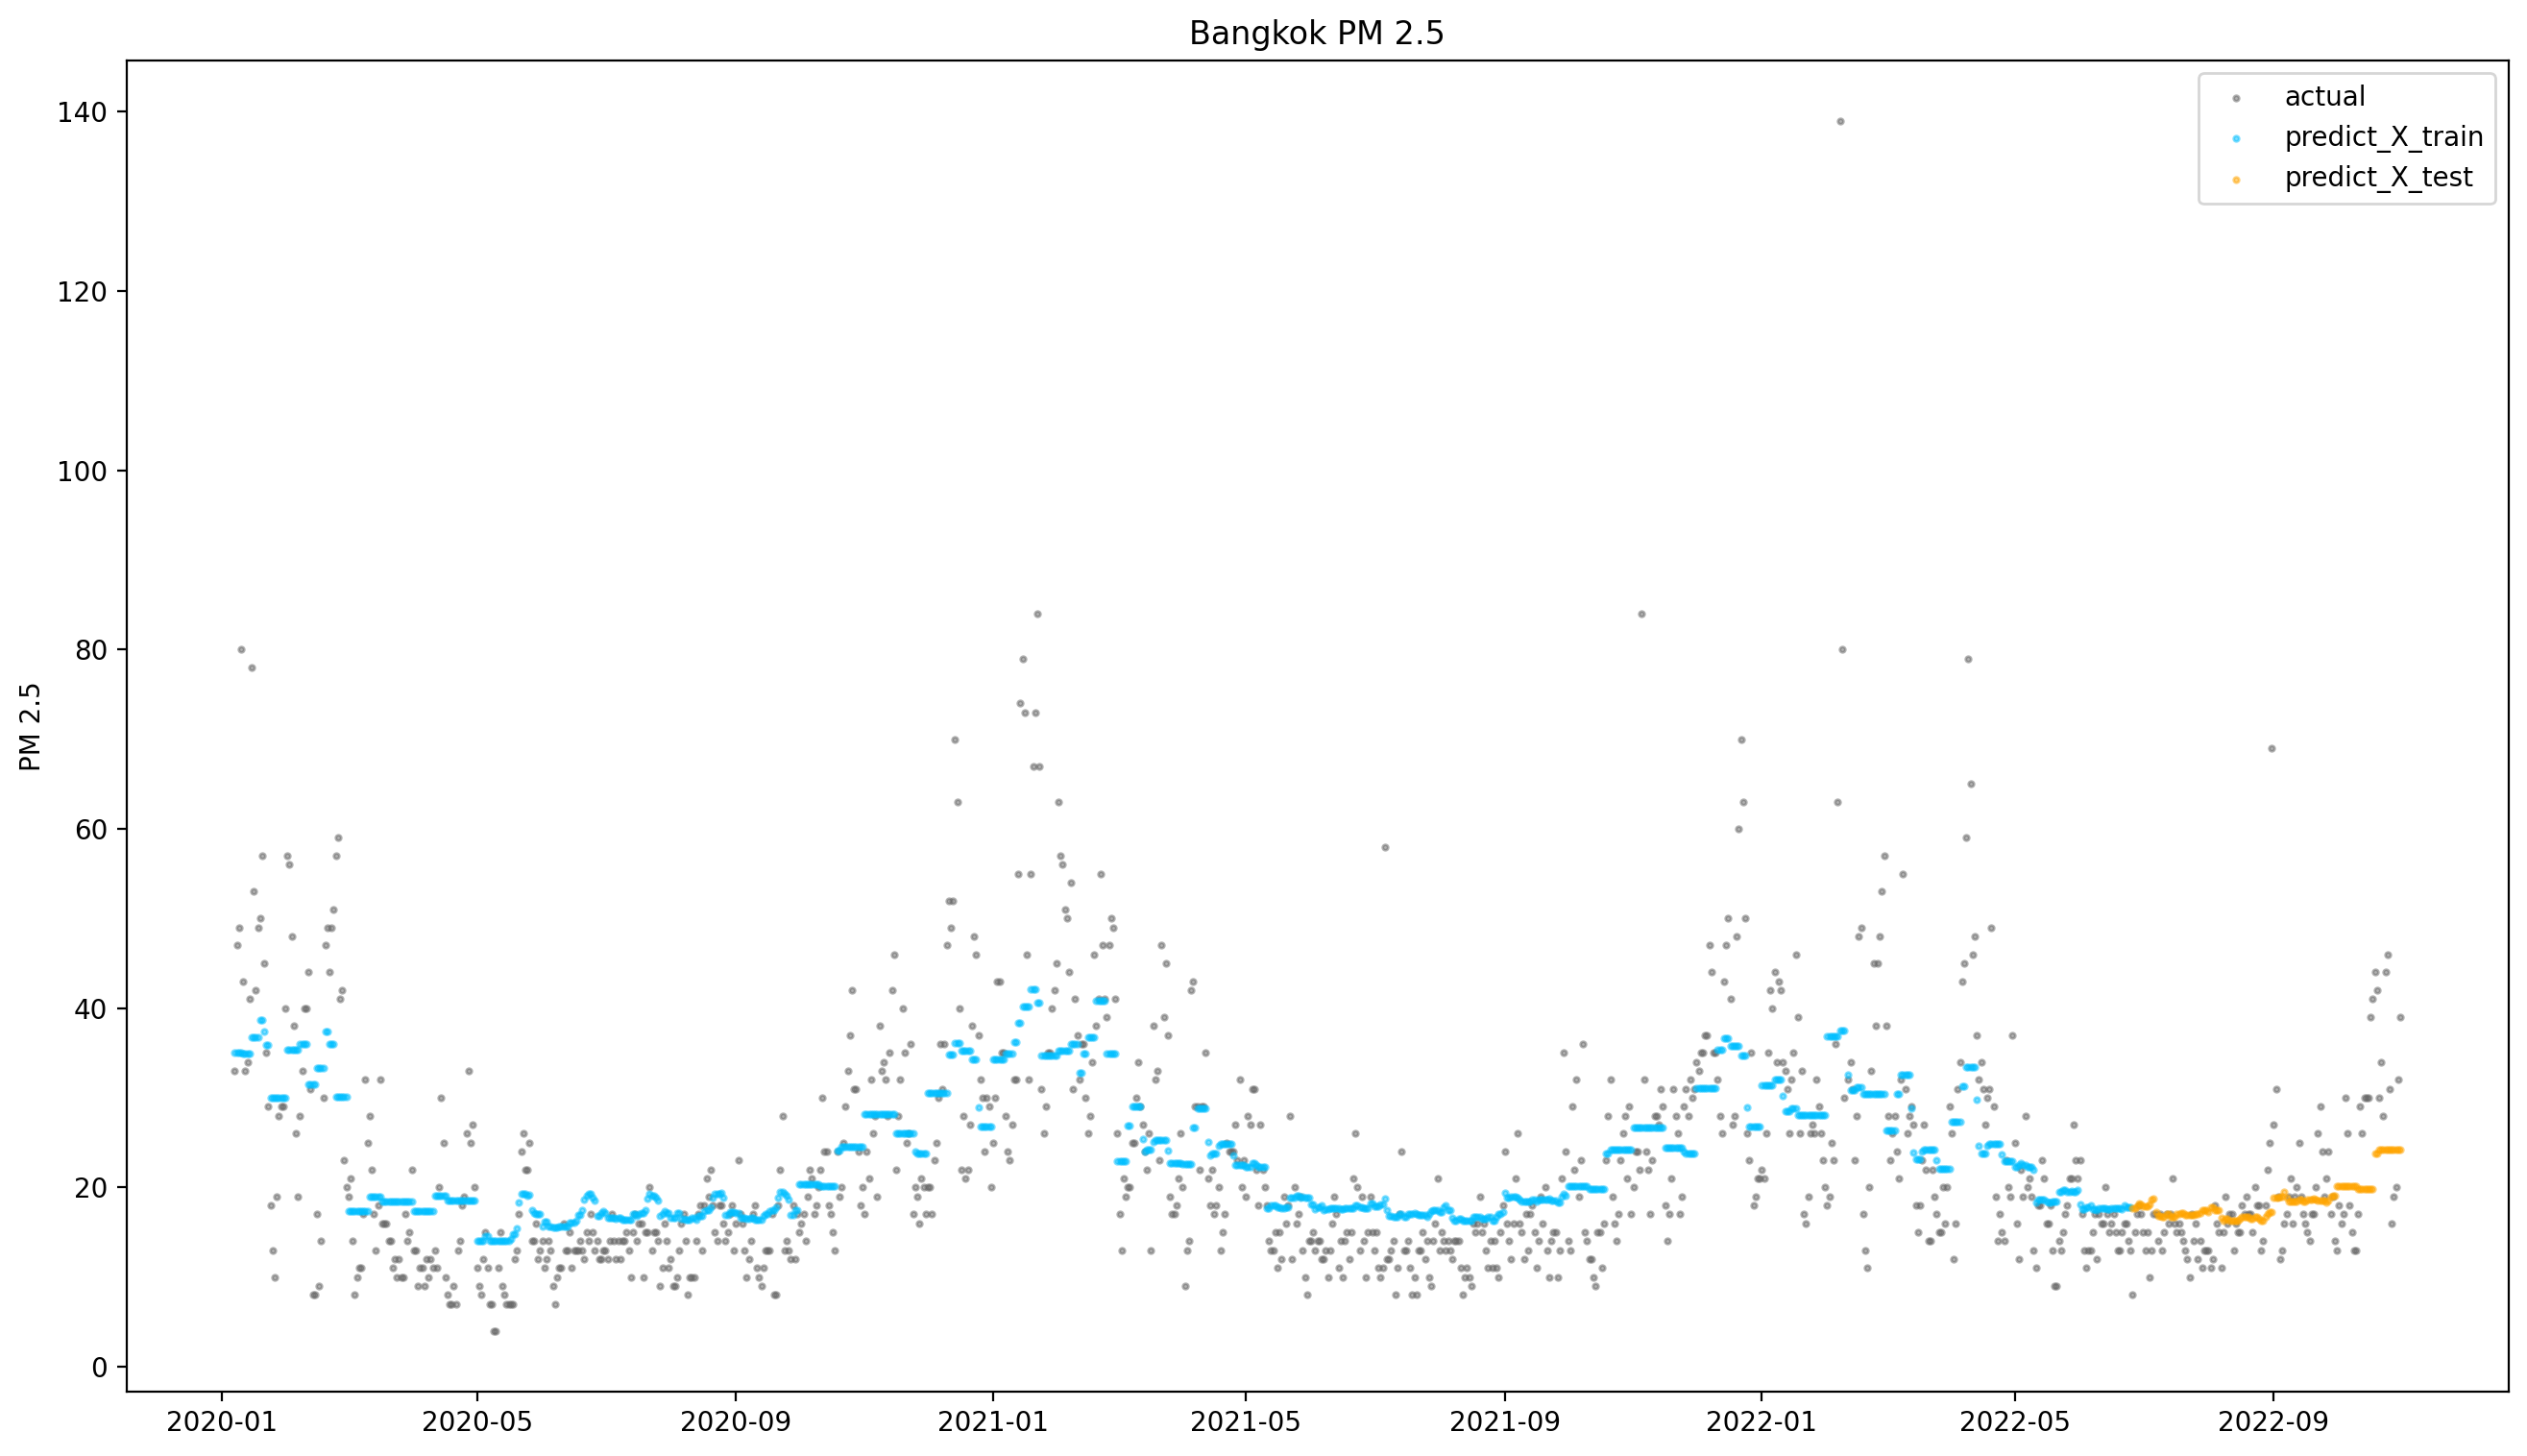

In [26]:
plt.figure(figsize=(16, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [27]:
df1.head(3000)

year  month  day   day_name  pm25
date                                         
2020-01-07  2020      1    7    Tuesday  33.0
2020-01-08  2020      1    8  Wednesday  47.0
2020-01-09  2020      1    9   Thursday  49.0
2020-01-10  2020      1   10     Friday  80.0
2020-01-11  2020      1   11   Saturday  43.0
...          ...    ...  ...        ...   ...
2022-10-27  2022     10   27   Thursday  16.0
2022-10-28  2022     10   28     Friday  19.0
2022-10-29  2022     10   29   Saturday  20.0
2022-10-30  2022     10   30     Sunday  32.0
2022-10-31  2022     10   31     Monday  39.0

[1028 rows x 5 columns]

In [28]:
yhat1=[]

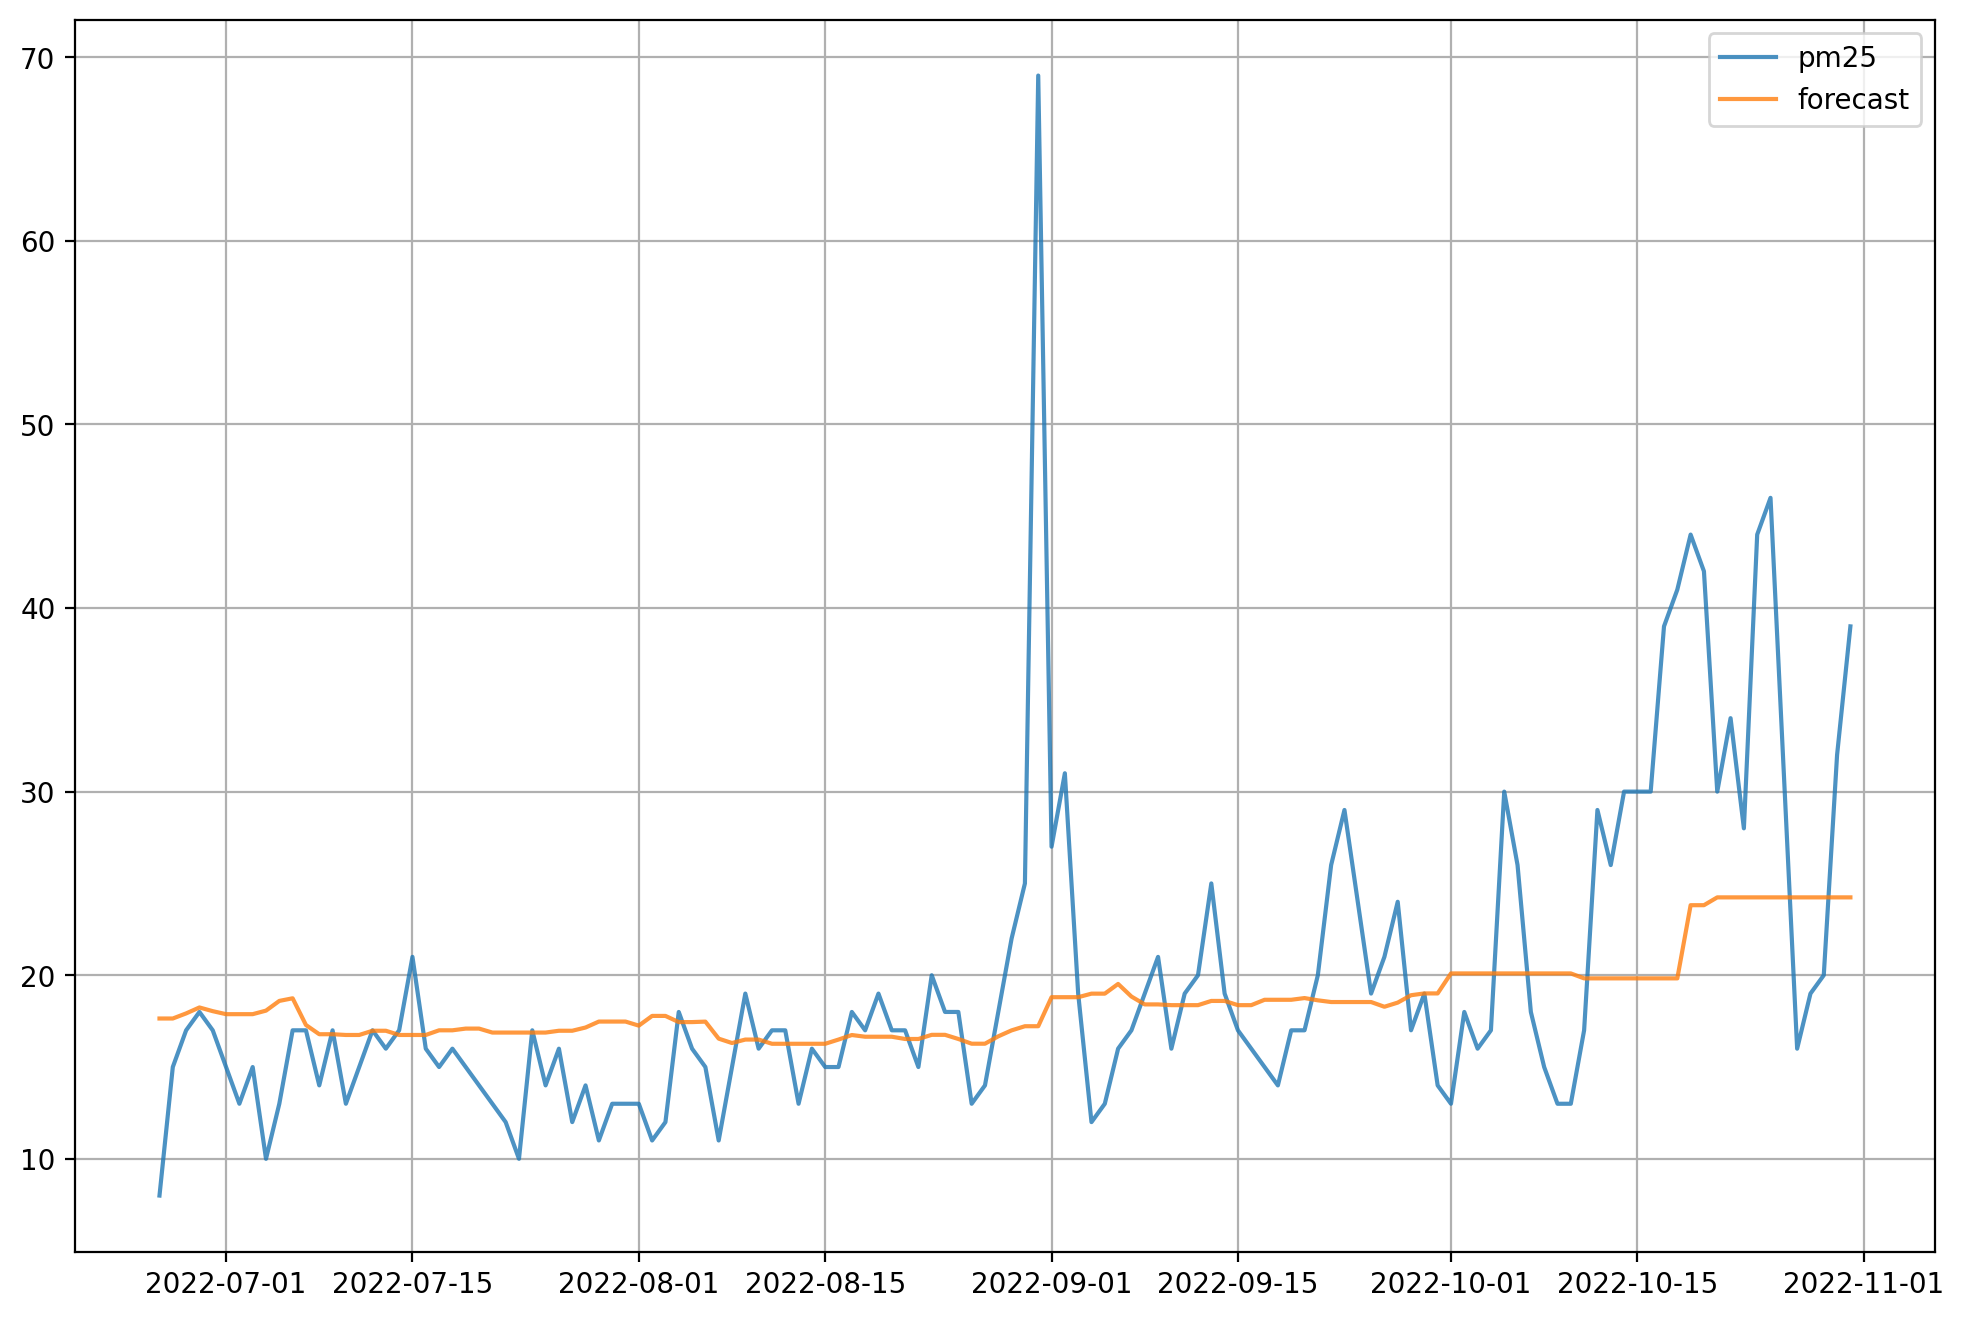

In [29]:
# test พยากรณ์กราฟ
yhat1 = light_reg.predict(X_test)

# Constructing the forecast dataframe
fc = df1.tail(len(yhat1)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat1
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [30]:
predict = pd.DataFrame(yhat1)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(7)
ypred


พยากรณ์ PM2.5
0      17.642775
1      17.642775
2      17.920120
3      18.244088
4      18.042502
5      17.879051
6      17.879051

In [31]:
Y_pred=light_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(Y_pred,y_test)
print('MSE',mse1)
rmse = np.sqrt(mse1)
print('RMSE',rmse)

 
test=X_test.copy()
test['light_pred'] = light_pred
test

MSE 62.14939161443807
RMSE 7.883488543432918


year  month  day   day_name  light_pred
date                                               
2022-06-26  2022      6   26     Sunday   17.642775
2022-06-27  2022      6   27     Monday   17.642775
2022-06-28  2022      6   28    Tuesday   17.920120
2022-06-29  2022      6   29  Wednesday   18.244088
2022-06-30  2022      6   30   Thursday   18.042502
...          ...    ...  ...        ...         ...
2022-10-27  2022     10   27   Thursday   24.240315
2022-10-28  2022     10   28     Friday   24.240315
2022-10-29  2022     10   29   Saturday   24.240315
2022-10-30  2022     10   30     Sunday   24.240315
2022-10-31  2022     10   31     Monday   24.240315

[128 rows x 5 columns]

In [32]:
#LSTM

In [33]:
from pandas import read_csv
from datetime import datetime
	
df2 = pd.read_csv('/content/drive/MyDrive/code/code/dindang/dataAir_dindang.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)


In [34]:
df2.describe().round(2).T

count     mean    std      min      25%      50%      75%  \
pm10              1698.0    67.79  24.90     1.00    49.00    63.00    81.00   
co                1714.0     1.22   4.93     0.00     0.54     0.74     1.20   
no                1713.0    35.27  20.58     0.29    18.53    32.00    48.70   
no2               1713.0    24.31  14.24     1.19    15.19    21.07    29.93   
nox               1712.0    55.67  27.92     2.16    35.29    51.90    73.19   
pm25              1028.0    23.18  13.58     4.00    14.00    19.00    29.00   
avgT              1695.0    30.24   1.76    16.60    29.30    30.30    31.30   
humid             1765.0    73.93   8.26    32.00    69.00    74.00    79.00   
pressure-monthly  1765.0  1008.48   2.13  1004.94  1006.53  1008.20  1010.15   
windDir           1735.0   188.91  85.55     0.00   120.00   190.00   250.00   
windSpd           1737.0     8.07   2.61     1.00     6.00     8.00     9.00   

                      max  
pm10               205.00  
co                 123.48  
no                 140.80  
no2                119.00  
nox                176.92  
pm25               139.00  
avgT                35.10  
humid               97.00  
pressure-monthly  1012.61  
windDir            360.00  
windSpd             24.00

In [35]:
dd = df2.drop(['pm10', 'no','no2', 'nox', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd'],axis = 1)
dd.head()

pm25
date            
2018-01-01   NaN
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN

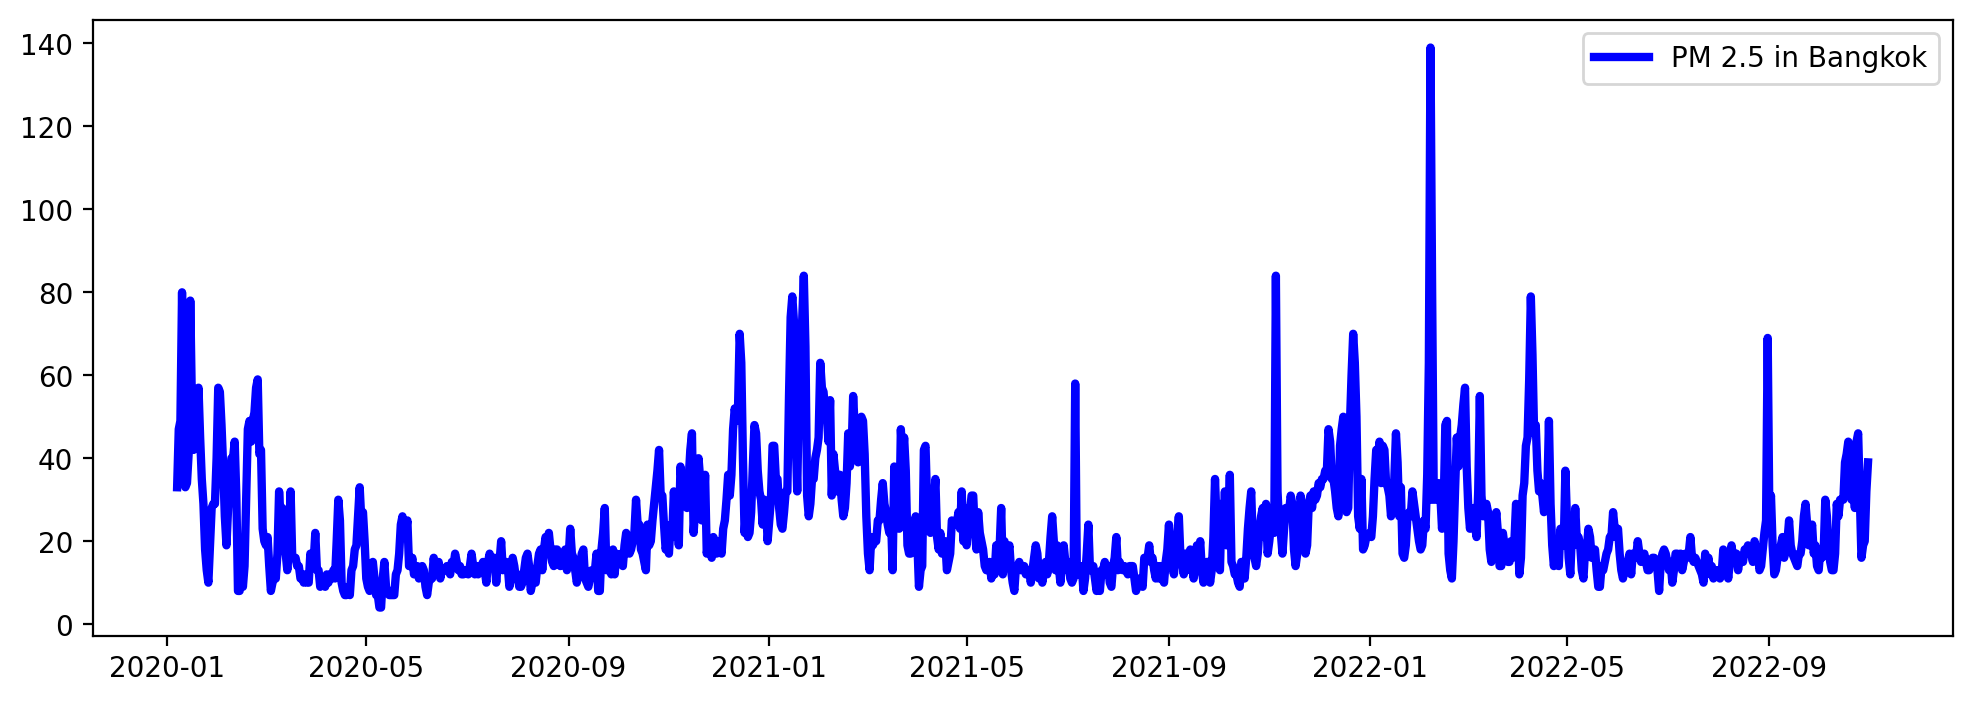

In [36]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 in Bangkok')
plt.legend()
plt.show()

In [37]:
y_col='pm25'

In [38]:
df2.dropna(subset=[y_col], inplace=True)
df = df2.reset_index(drop=True)
df

pm10    co     no    no2     nox  pm25  avgT  humid  pressure-monthly  \
0     140.0  1.09  21.66  34.04   55.70  33.0  30.8     63           1011.12   
1     118.0  0.93  26.20  31.36   57.55  47.0  30.5     69           1011.12   
2     137.0  1.37  73.71  42.93  116.34  49.0  30.8     68           1011.12   
3     183.0  1.45  57.53  55.32  112.85  80.0  30.6     69           1011.12   
4     123.0  0.67   6.79  26.72   33.51  43.0  29.8     80           1011.12   
...     ...   ...    ...    ...     ...   ...   ...    ...               ...   
1023   46.0  0.50  25.33  20.40   45.73  16.0  28.5     79           1009.24   
1024   55.0  0.60  41.57  25.20   66.77  19.0  29.6     72           1009.24   
1025   57.0  0.50  21.73  24.70   46.45  20.0  29.5     62           1009.24   
1026   80.0  0.90  35.39  38.30   73.66  32.0  30.0     62           1009.24   
1027   80.0  0.70  17.77  34.10   51.91  39.0   NaN     59           1009.24   

      windDir  windSpd  
0       110.0      6.0  
1       120.0      9.0  
2       240.0      8.0  
3       120.0      8.0  
4       160.0     14.0  
...       ...      ...  
1023    120.0      9.0  
1024    170.0      7.0  
1025    120.0     13.0  
1026    120.0     13.0  
1027      NaN      NaN  

[1028 rows x 11 columns]

In [39]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1028 entries, 2020-01-07 to 2022-10-31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm10              1027 non-null   float64
 1   co                1028 non-null   float64
 2   no                1027 non-null   float64
 3   no2               1027 non-null   float64
 4   nox               1026 non-null   float64
 5   pm25              1028 non-null   float64
 6   avgT              1016 non-null   float64
 7   humid             1028 non-null   int64  
 8   pressure-monthly  1028 non-null   float64
 9   windDir           1016 non-null   float64
 10  windSpd           1016 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 96.4 KB


(1028, 11)

In [40]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[0.68137255, 0.01045564, 0.15208882, 0.27791943, 0.29203803,
        0.21481481, 0.69827586, 0.32      , 0.80212483, 0.30555556,
        0.1       ],
       [0.57352941, 0.00892086, 0.18439969, 0.25514193, 0.3030303 ,
        0.31851852, 0.67241379, 0.44      , 0.80212483, 0.33333333,
        0.25      ],
       [0.66666667, 0.01314149, 0.52252509, 0.35347612, 0.652347  ,
        0.33333333, 0.69827586, 0.42      , 0.80212483, 0.66666667,
        0.2       ],
       [0.89215686, 0.01390887, 0.40737314, 0.45877953, 0.63161022,
        0.56296296, 0.68103448, 0.44      , 0.80212483, 0.33333333,
        0.2       ],
       [0.59803922, 0.00642686, 0.04626005, 0.21570627, 0.16019014,
        0.28888889, 0.61206897, 0.66      , 0.80212483, 0.44444444,
        0.5       ],
       [0.5245098 , 0.0053717 , 0.04348445, 0.17219106, 0.12739156,
        0.21481481, 0.67241379, 0.66      , 0.80212483, 0.44444444,
        0.05      ],
       [0.50490196, 1.        , 0.12796242, 0.20499745, 0.

In [41]:
n_train = int(df.shape[0] * 0.80)
n_train

822

In [42]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [43]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((822, 11), (206, 11))

In [44]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [46]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [47]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df2,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [48]:
model = deep_learner.LSTModel() 

Epoch 1/60
4/4 [==============================] - 2s 113ms/step - loss: 681.7330 - val_loss: 365.4607
Epoch 2/60
4/4 [==============================] - 0s 20ms/step - loss: 629.2453 - val_loss: 332.2562
Epoch 3/60
4/4 [==============================] - 0s 20ms/step - loss: 557.3528 - val_loss: 285.9883
Epoch 4/60
4/4 [==============================] - 0s 21ms/step - loss: 454.3181 - val_loss: 220.5427
Epoch 5/60
4/4 [==============================] - 0s 25ms/step - loss: 323.2683 - val_loss: 143.2400
Epoch 6/60
4/4 [==============================] - 0s 22ms/step - loss: 221.2552 - val_loss: 91.4258
Epoch 7/60
4/4 [==============================] - 0s 29ms/step - loss: 186.2385 - val_loss: 71.2623
Epoch 8/60
4/4 [==============================] - 0s 29ms/step - loss: 154.4530 - val_loss: 59.0550
Epoch 9/60
4/4 [==============================] - 0s 20ms/step - loss: 127.9388 - val_loss: 51.9002
Epoch 10/60
4/4 [==============================] - 0s 21ms/step - loss: 110.4188 - val_loss: 4

In [49]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df2.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

5/5 [==============================] - 0s 3ms/step


In [50]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
4/4 [==============================] - 2s 85ms/step - loss: 569.5762
Epoch 2/10
4/4 [==============================] - 0s 86ms/step - loss: 405.9082
Epoch 3/10
4/4 [==============================] - 0s 92ms/step - loss: 212.9239
Epoch 4/10
4/4 [==============================] - 0s 98ms/step - loss: 150.0125
Epoch 5/10
4/4 [==============================] - 0s 90ms/step - loss: 141.4284
Epoch 6/10
4/4 [==============================] - 0s 88ms/step - loss: 148.6006
Epoch 7/10
4/4 [==============================] - 0s 84ms/step - loss: 134.2165
Epoch 8/10
4/4 [==============================] - 0s 90ms/step - loss: 127.4904
Epoch 9/10
4/4 [==============================] - 0s 88ms/step - loss: 123.1705
Epoch 10/10
1/1 [==============================] - 0s 38ms/step


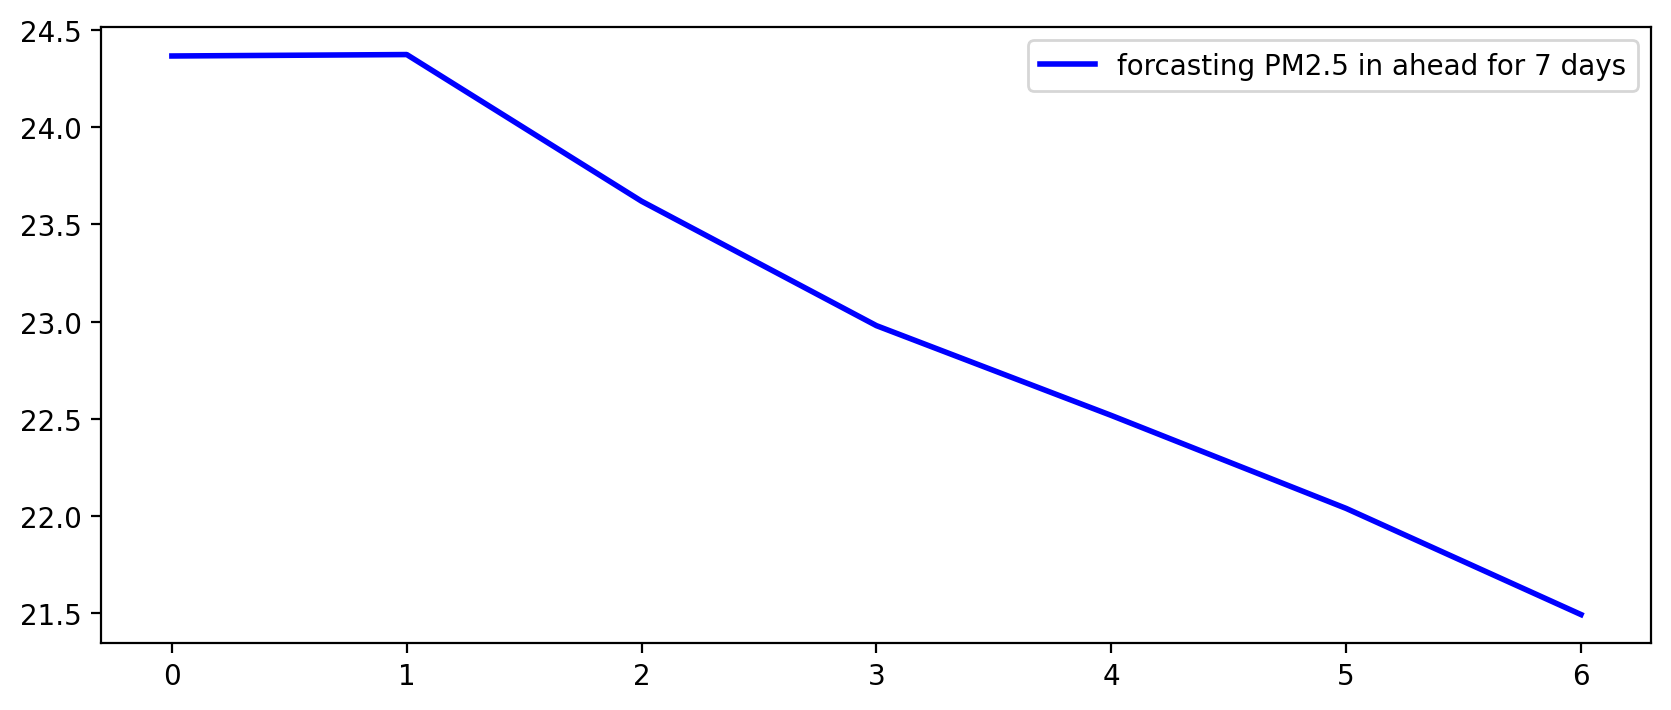

In [51]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [52]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

พยากรณ์ PM2.5
0      24.366339
1      24.373747
2      23.619238
3      22.979357
4      22.517578
5      22.039310
6      21.493414

In [53]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

พยากรณ์ PM2.5
0           24.0
1           24.0
2           24.0
3           23.0
4           23.0
5           22.0
6           21.0

In [54]:
ypred.mean().round(0)

พยากรณ์ PM2.5    23.0
dtype: float32

In [55]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(ypred,yhat)
p_mse = mse2*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 12.81471699476242
RMSE 3.5797649356853616


In [56]:
#prophet

In [57]:
#import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
from pandas import read_csv
from datetime import datetime
	
df3 = pd.read_csv('/content/drive/MyDrive/code/code/dindang/dataAir_dindang.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
df3 

date  pm10   co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   NaN  NaN    NaN   NaN    NaN   NaN  27.1     70   
1    2018-01-02   NaN  NaN    NaN   NaN    NaN   NaN  27.5     67   
2    2018-01-03   NaN  NaN    NaN   NaN    NaN   NaN  28.2     66   
3    2018-01-04   NaN  NaN    NaN   NaN    NaN   NaN  29.3     64   
4    2018-01-05   NaN  NaN    NaN   NaN    NaN   NaN  30.4     63   
...         ...   ...  ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27  46.0  0.5  25.33  20.4  45.73  16.0  28.5     79   
1761 2022-10-28  55.0  0.6  41.57  25.2  66.77  19.0  29.6     72   
1762 2022-10-29  57.0  0.5  21.73  24.7  46.45  20.0  29.5     62   
1763 2022-10-30  80.0  0.9  35.39  38.3  73.66  32.0  30.0     62   
1764 2022-10-31  80.0  0.7  17.77  34.1  51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1698 non-null   float64       
 2   co                1714 non-null   float64       
 3   no                1713 non-null   float64       
 4   no2               1713 non-null   float64       
 5   nox               1712 non-null   float64       
 6   pm25              1028 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


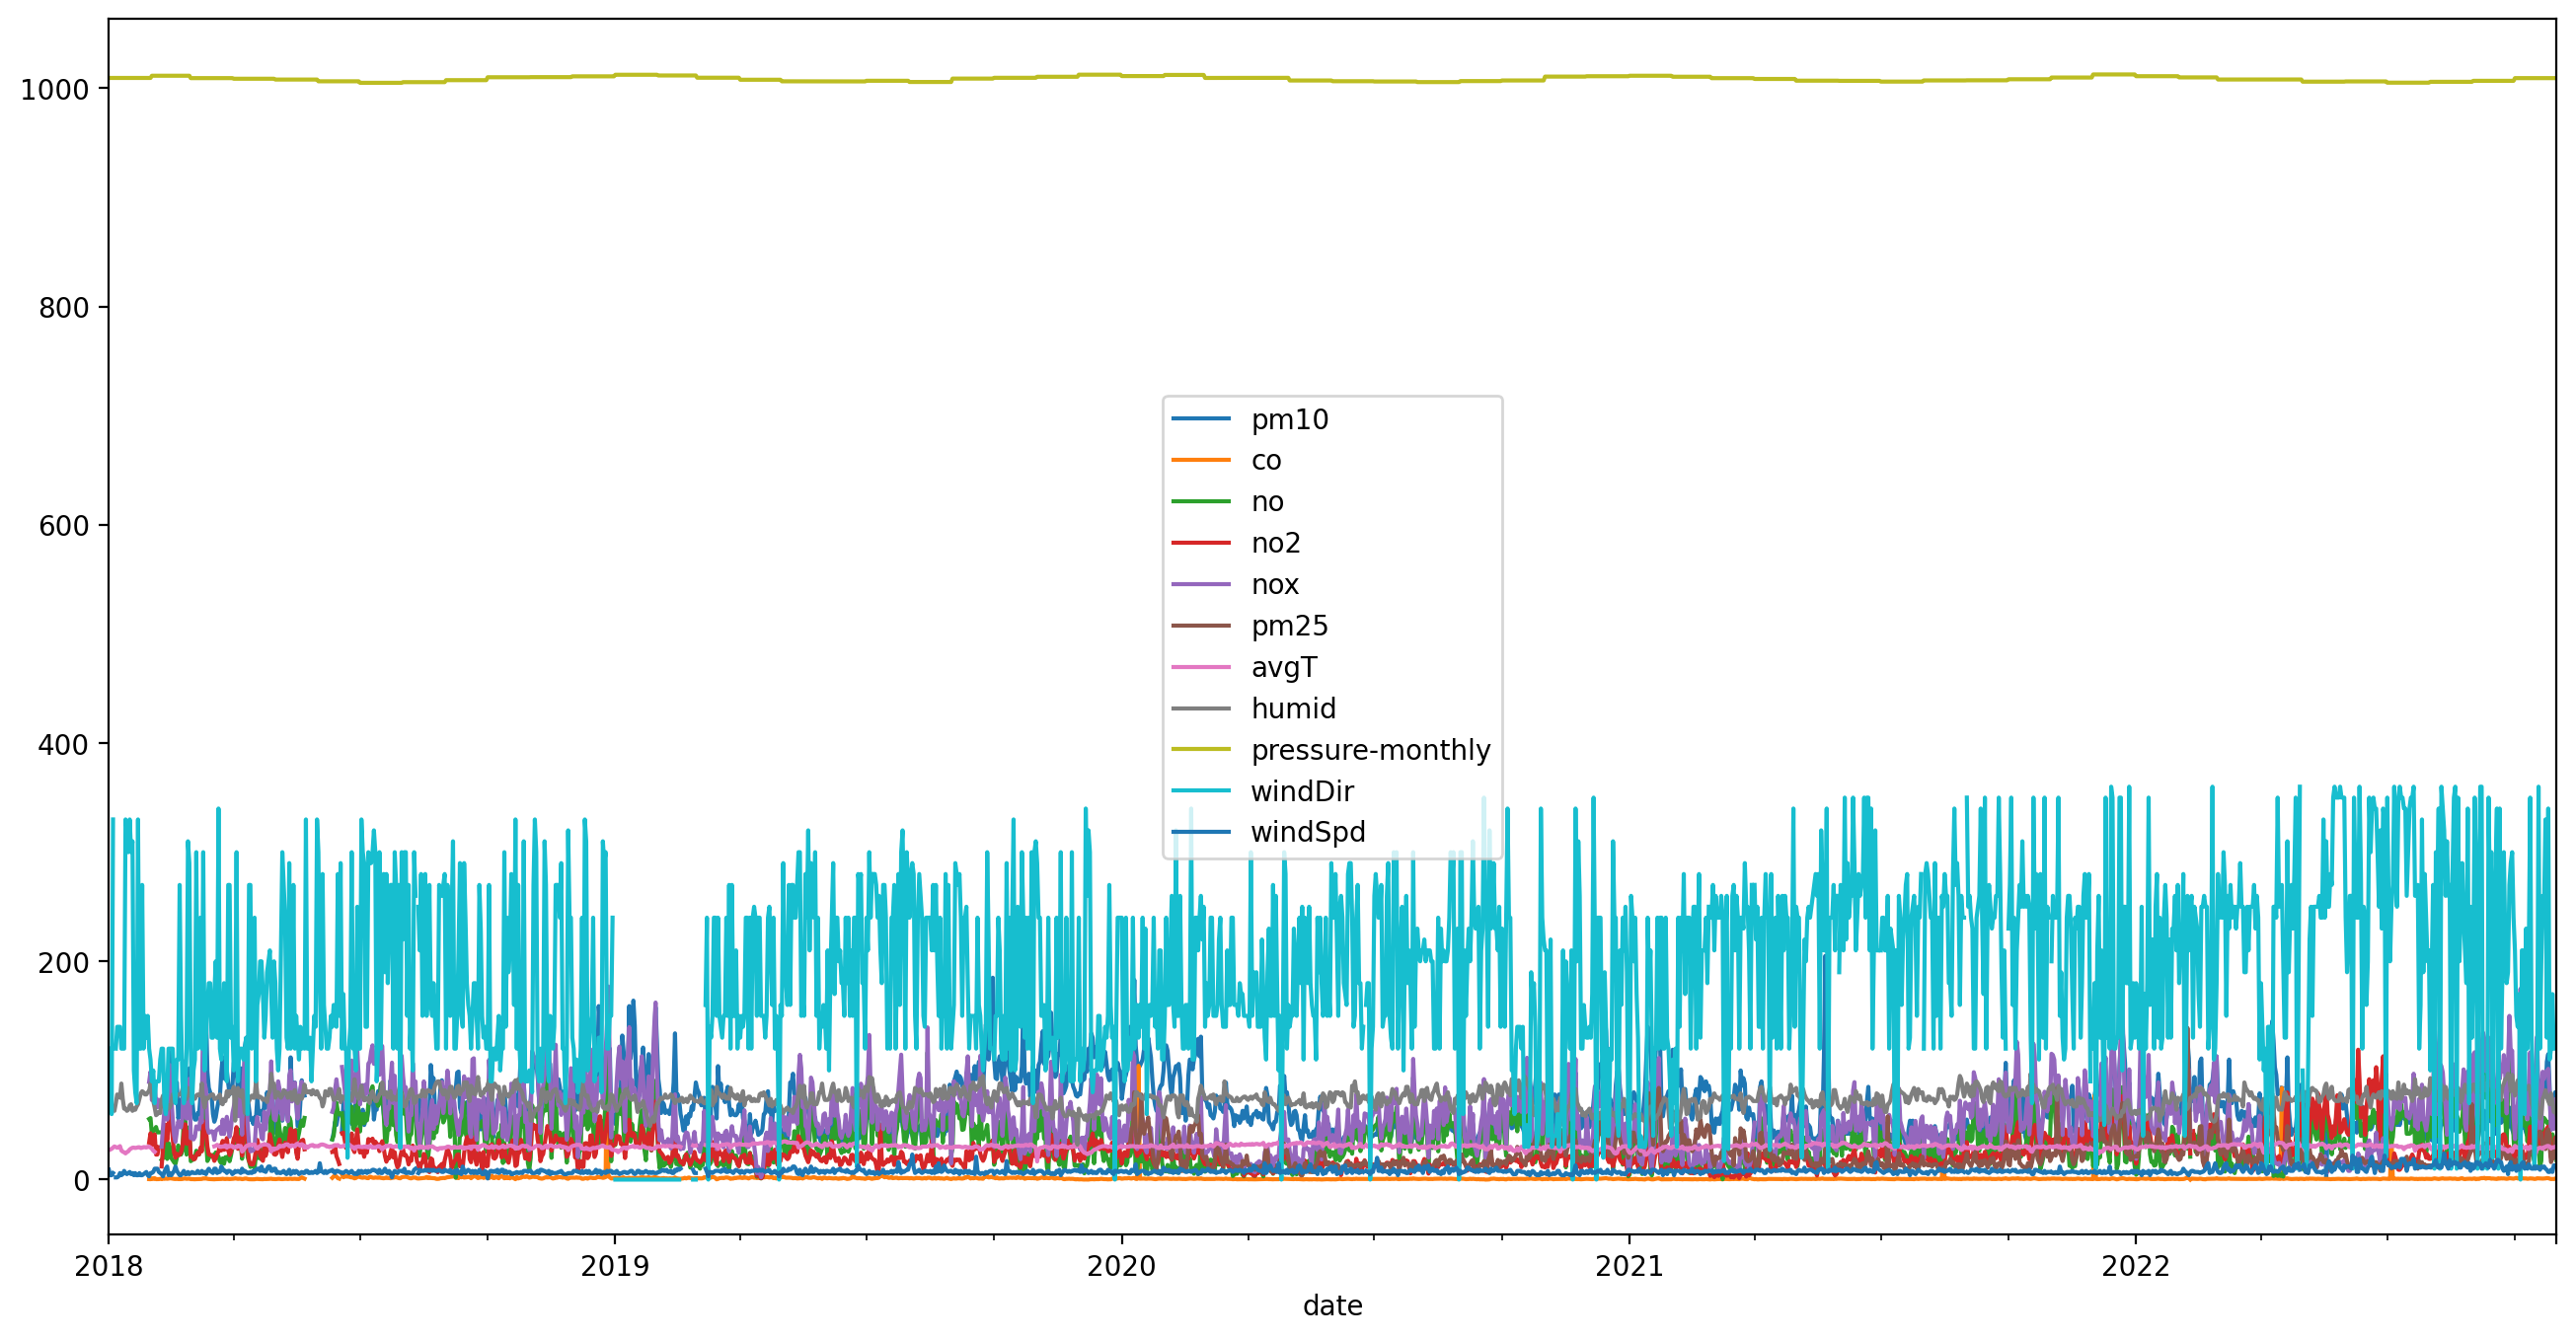

In [61]:
df3.set_index('date').plot(figsize=(16, 8));

In [62]:
data3 = df3.sort_values('date').reset_index(drop=True).copy()
data3

date  pm10   co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   NaN  NaN    NaN   NaN    NaN   NaN  27.1     70   
1    2018-01-02   NaN  NaN    NaN   NaN    NaN   NaN  27.5     67   
2    2018-01-03   NaN  NaN    NaN   NaN    NaN   NaN  28.2     66   
3    2018-01-04   NaN  NaN    NaN   NaN    NaN   NaN  29.3     64   
4    2018-01-05   NaN  NaN    NaN   NaN    NaN   NaN  30.4     63   
...         ...   ...  ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27  46.0  0.5  25.33  20.4  45.73  16.0  28.5     79   
1761 2022-10-28  55.0  0.6  41.57  25.2  66.77  19.0  29.6     72   
1762 2022-10-29  57.0  0.5  21.73  24.7  46.45  20.0  29.5     62   
1763 2022-10-30  80.0  0.9  35.39  38.3  73.66  32.0  30.0     62   
1764 2022-10-31  80.0  0.7  17.77  34.1  51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [63]:
y_col = 'pm25'

In [64]:
data3.dropna(subset=[y_col], inplace=True)
data3

date   pm10    co     no    no2     nox  pm25  avgT  humid  \
736  2020-01-07  140.0  1.09  21.66  34.04   55.70  33.0  30.8     63   
737  2020-01-08  118.0  0.93  26.20  31.36   57.55  47.0  30.5     69   
738  2020-01-09  137.0  1.37  73.71  42.93  116.34  49.0  30.8     68   
739  2020-01-10  183.0  1.45  57.53  55.32  112.85  80.0  30.6     69   
740  2020-01-11  123.0  0.67   6.79  26.72   33.51  43.0  29.8     80   
...         ...    ...   ...    ...    ...     ...   ...   ...    ...   
1760 2022-10-27   46.0  0.50  25.33  20.40   45.73  16.0  28.5     79   
1761 2022-10-28   55.0  0.60  41.57  25.20   66.77  19.0  29.6     72   
1762 2022-10-29   57.0  0.50  21.73  24.70   46.45  20.0  29.5     62   
1763 2022-10-30   80.0  0.90  35.39  38.30   73.66  32.0  30.0     62   
1764 2022-10-31   80.0  0.70  17.77  34.10   51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
736            1011.12    110.0      6.0  
737            1011.12    120.0      9.0  
738            1011.12    240.0      8.0  
739            1011.12    120.0      8.0  
740            1011.12    160.0     14.0  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1028 rows x 12 columns]

In [65]:
df3 = data3[['date', y_col]]
df3.columns=['ds', 'y']
df3

ds     y
736  2020-01-07  33.0
737  2020-01-08  47.0
738  2020-01-09  49.0
739  2020-01-10  80.0
740  2020-01-11  43.0
...         ...   ...
1760 2022-10-27  16.0
1761 2022-10-28  19.0
1762 2022-10-29  20.0
1763 2022-10-30  32.0
1764 2022-10-31  39.0

[1028 rows x 2 columns]

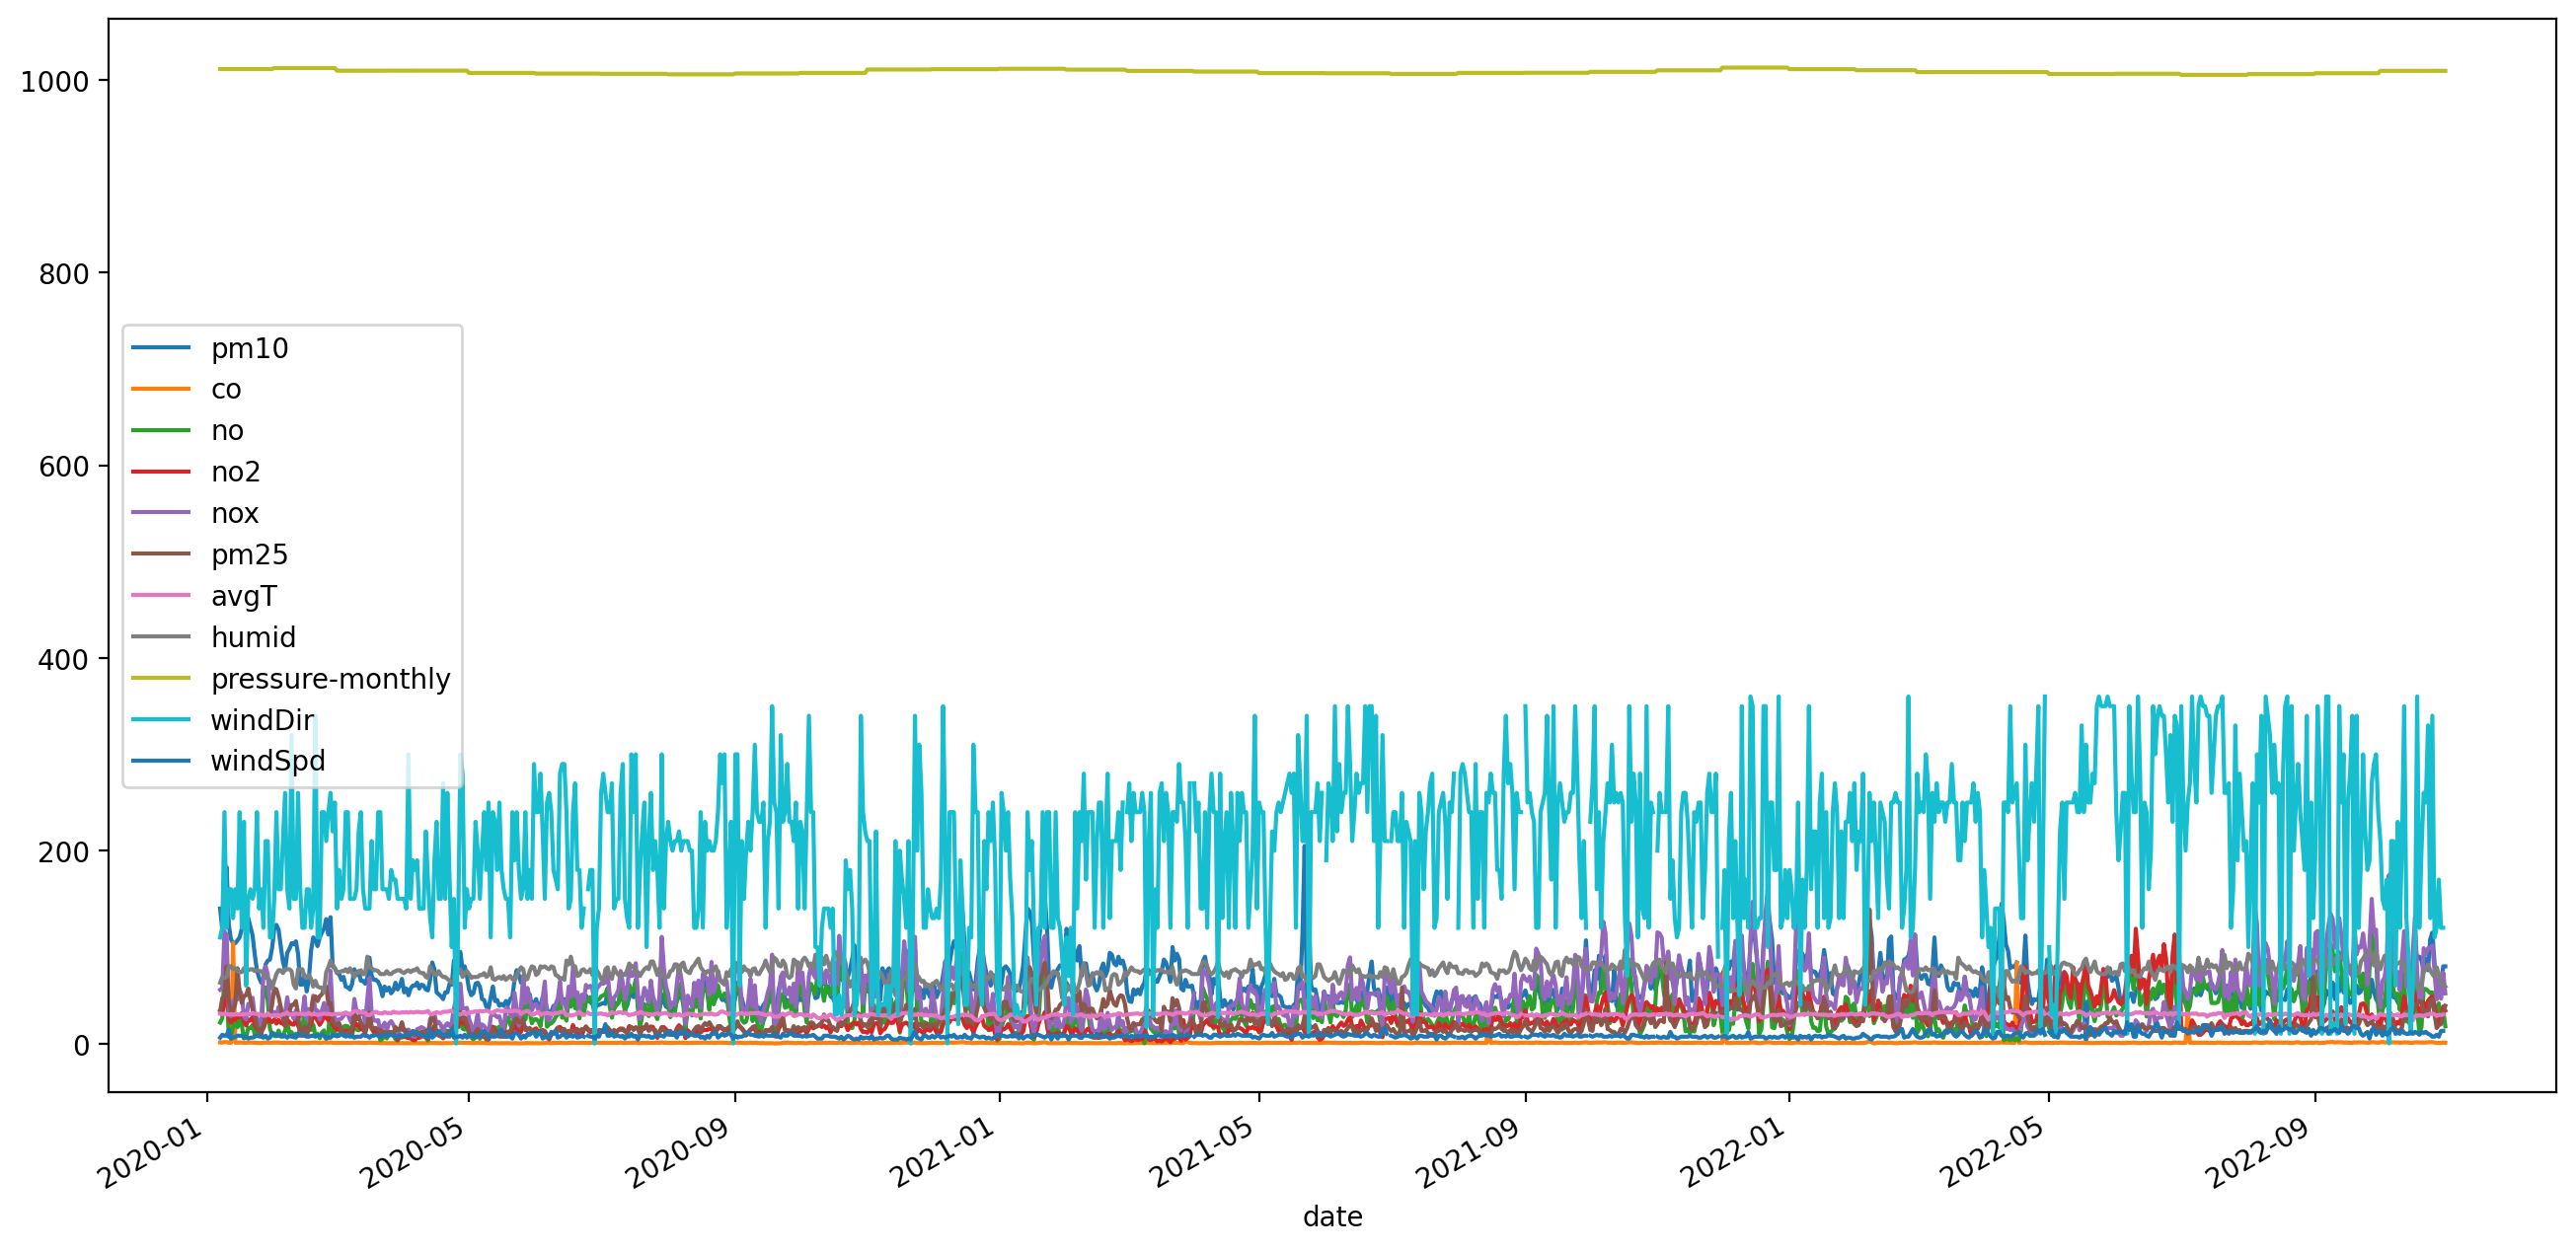

In [66]:
data3.set_index('date').plot(figsize=(16, 8));

In [67]:
model=Prophet()

In [68]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7f2db10581c0>}

In [69]:
model.fit(df3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdavf8yyn/ahl_scg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdavf8yyn/c2dsikqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35049', 'data', 'file=/tmp/tmpdavf8yyn/ahl_scg9.json', 'init=/tmp/tmpdavf8yyn/c2dsikqo.json', 'output', 'file=/tmp/tmpdavf8yyn/prophet_model2uj792_o/prophet_model-20230402093221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:32:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:32:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [70]:
df3.tail()

ds     y
1760 2022-10-27  16.0
1761 2022-10-28  19.0
1762 2022-10-29  20.0
1763 2022-10-30  32.0
1764 2022-10-31  39.0

In [71]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

ds
1203 2023-04-25
1204 2023-04-26
1205 2023-04-27
1206 2023-04-28
1207 2023-04-29

In [72]:
future.head()

ds
0 2020-01-07
1 2020-01-08
2 2020-01-09
3 2020-01-10
4 2020-01-11

In [73]:
ypred.mean().round(0)

พยากรณ์ PM2.5    23.0
dtype: float32

In [74]:
forecast = model.predict(future)

In [75]:
df3

ds     y
736  2020-01-07  33.0
737  2020-01-08  47.0
738  2020-01-09  49.0
739  2020-01-10  80.0
740  2020-01-11  43.0
...         ...   ...
1760 2022-10-27  16.0
1761 2022-10-28  19.0
1762 2022-10-29  20.0
1763 2022-10-30  32.0
1764 2022-10-31  39.0

[1028 rows x 2 columns]

In [76]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

ds       yhat  yhat_lower  yhat_upper
0    2020-01-07  33.040499   20.837333   46.372471
1    2020-01-08  34.274947   20.632354   47.278125
2    2020-01-09  33.436605   20.497194   46.072614
3    2020-01-10  33.715734   20.804777   46.305993
4    2020-01-11  33.319051   21.127471   46.061258
...         ...        ...         ...         ...
1203 2023-04-25  29.014573   15.347059   42.299902
1204 2023-04-26  29.299521   16.525121   41.558709
1205 2023-04-27  27.503498   13.538079   40.550091
1206 2023-04-28  26.831552   14.061177   39.882604
1207 2023-04-29  25.504794   12.410587   38.422350

[1208 rows x 4 columns]

In [77]:
dt=pd.merge(df3, dfcst, left_on='ds', right_on='ds')
dt

ds     y       yhat  yhat_lower  yhat_upper
0    2020-01-07  33.0  33.040499   20.837333   46.372471
1    2020-01-08  47.0  34.274947   20.632354   47.278125
2    2020-01-09  49.0  33.436605   20.497194   46.072614
3    2020-01-10  80.0  33.715734   20.804777   46.305993
4    2020-01-11  43.0  33.319051   21.127471   46.061258
...         ...   ...        ...         ...         ...
1023 2022-10-27  16.0  31.553928   18.769952   44.790165
1024 2022-10-28  19.0  31.740787   19.392388   44.819248
1025 2022-10-29  20.0  31.194491   18.253739   43.618192
1026 2022-10-30  32.0  30.887084   18.595157   43.853561
1027 2022-10-31  39.0  33.465770   19.783607   46.644986

[1028 rows x 5 columns]

In [78]:
dt.shape

(1028, 5)

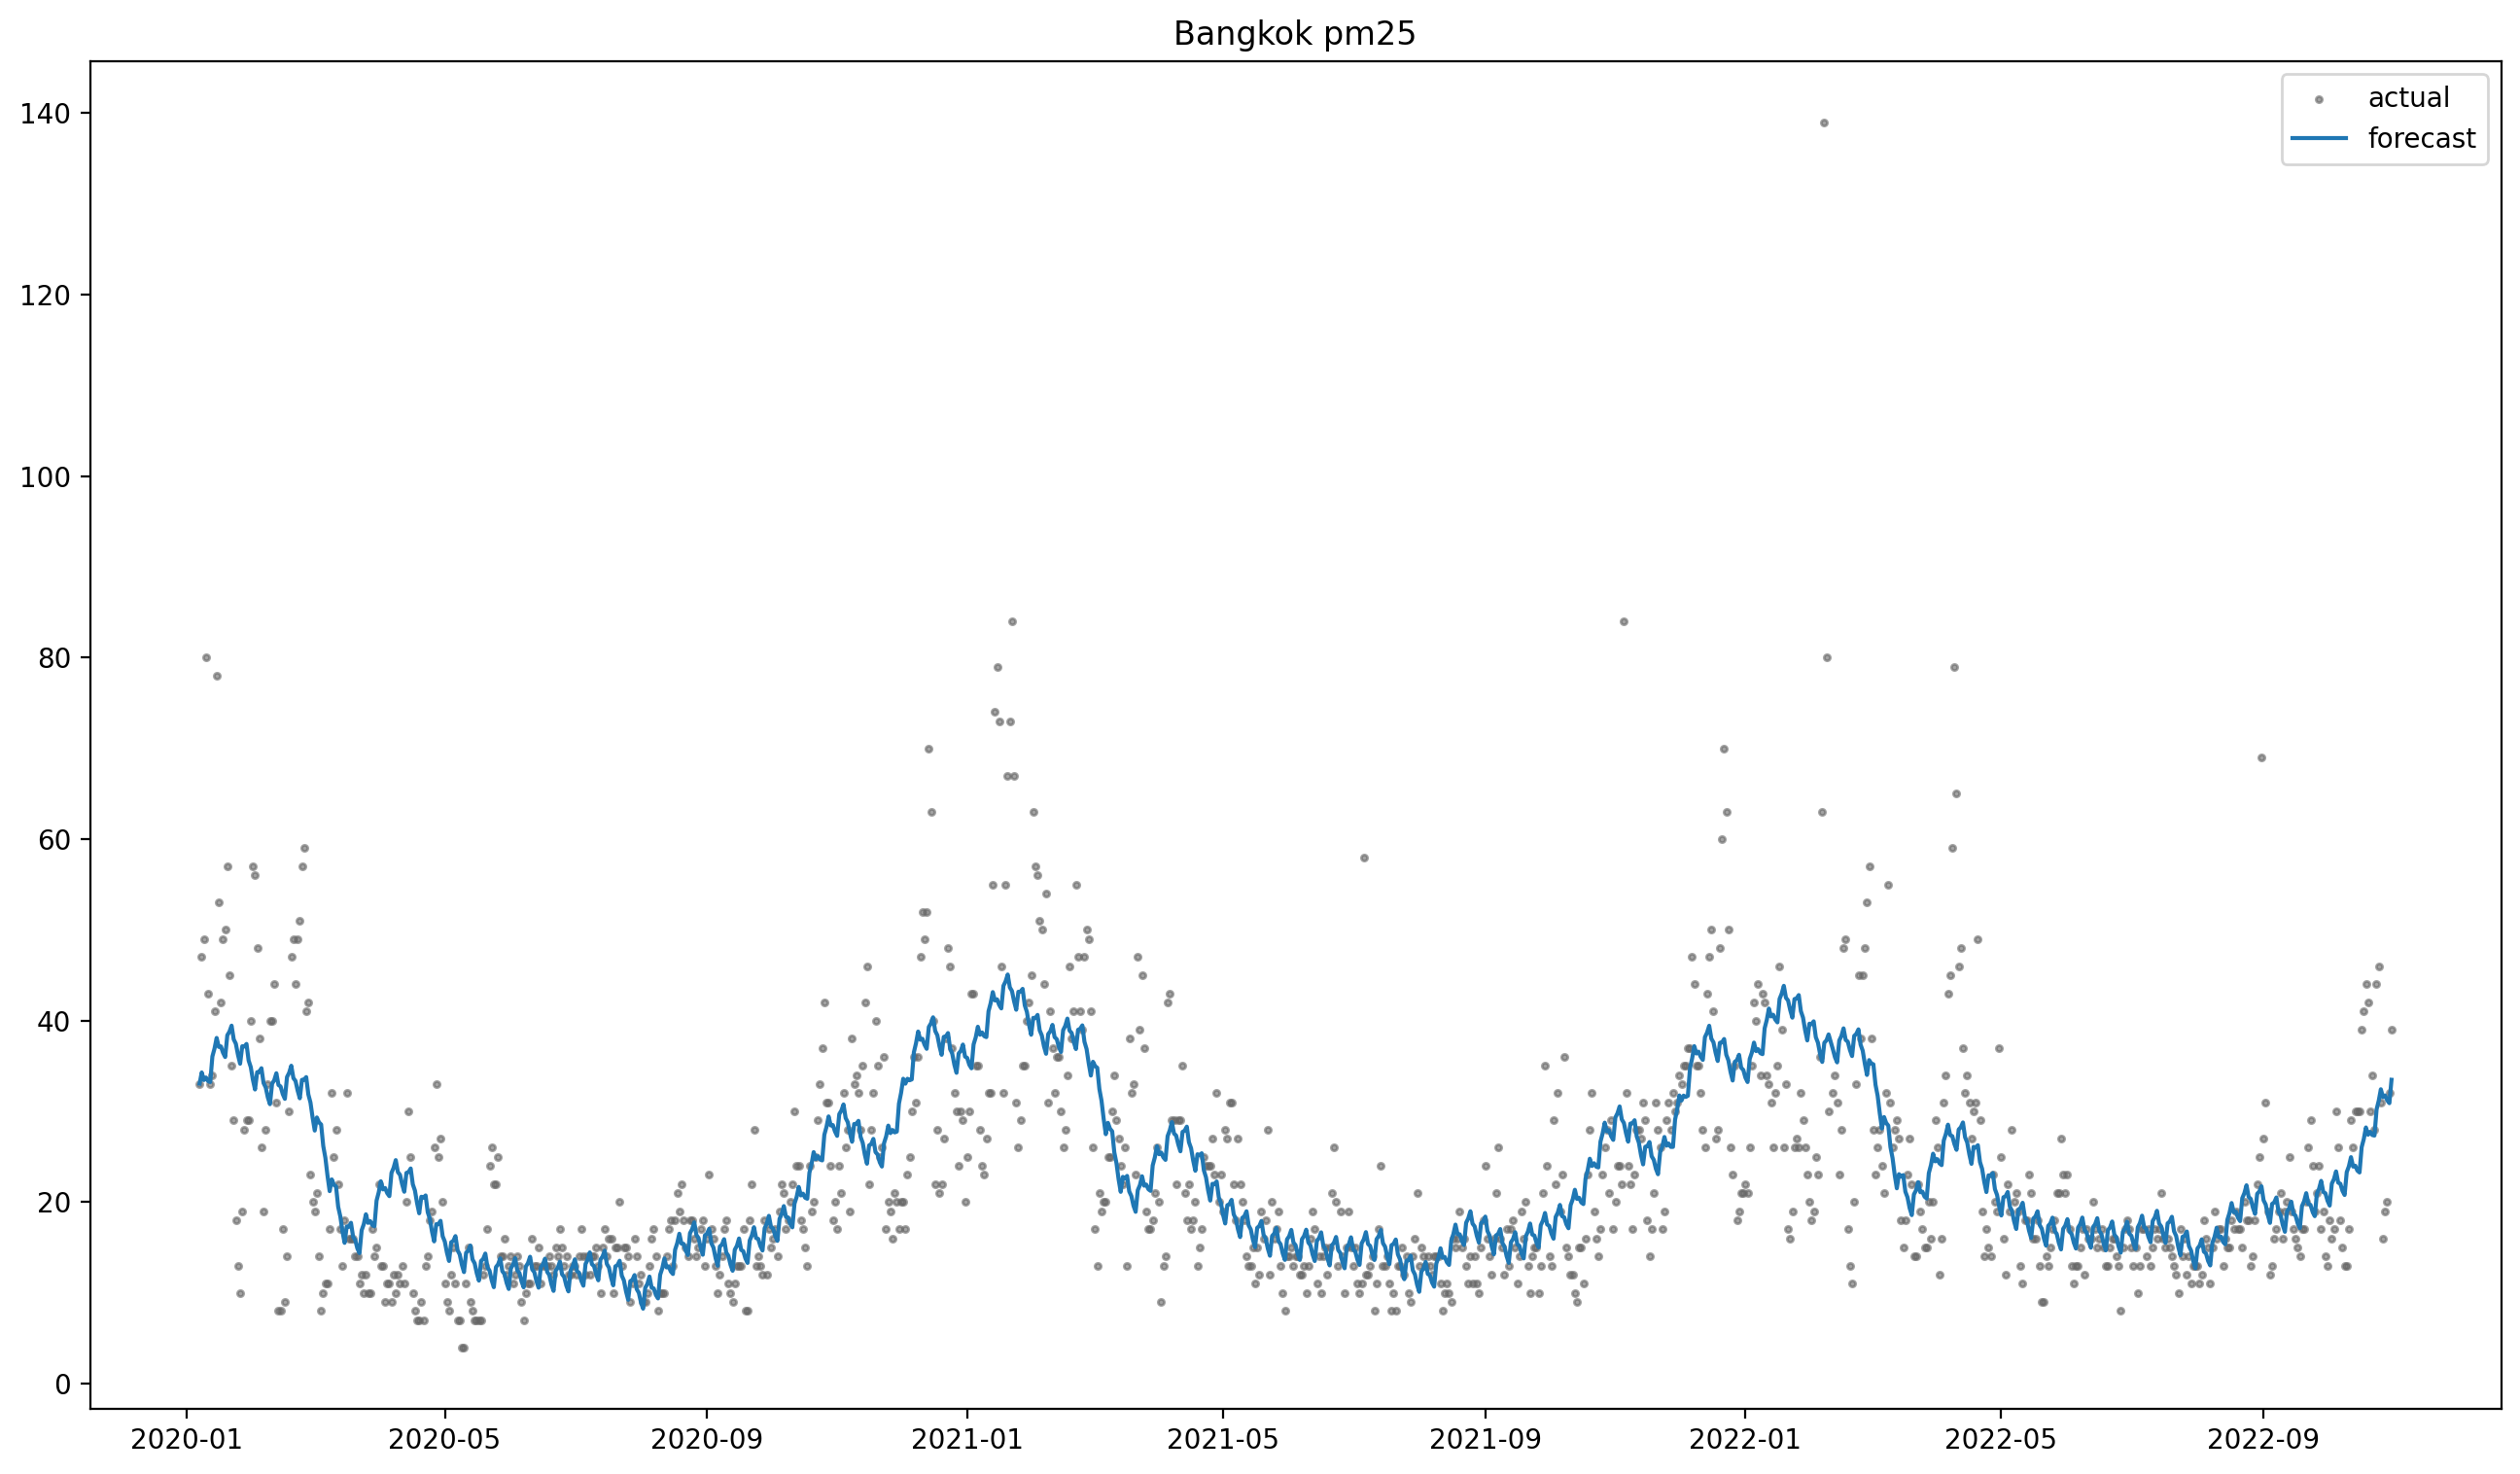

In [79]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Bangkok {y_col}')
plt.legend();

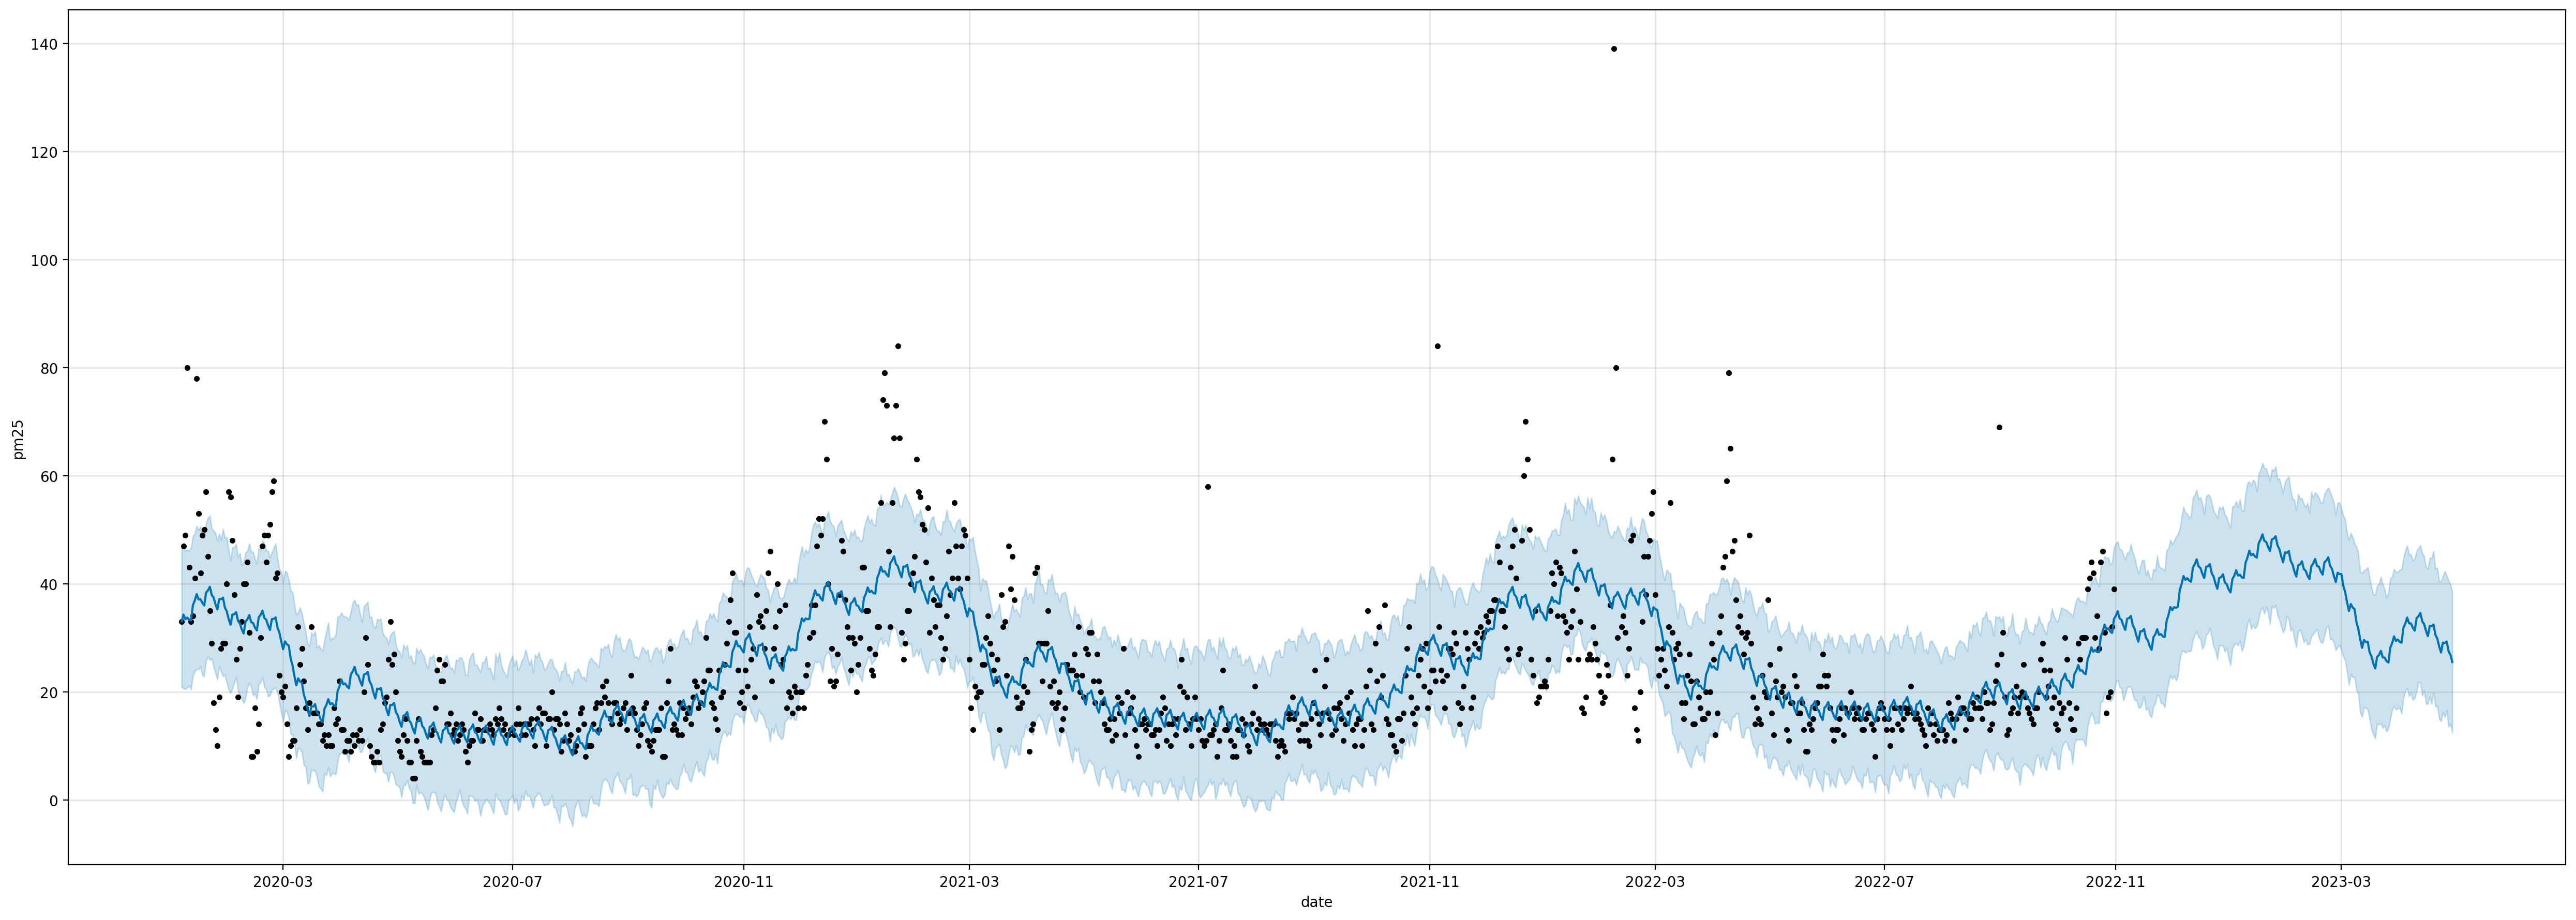

In [80]:
fig=model.plot(forecast, uncertainty=True, figsize=(25, 9), xlabel='date', ylabel=y_col)

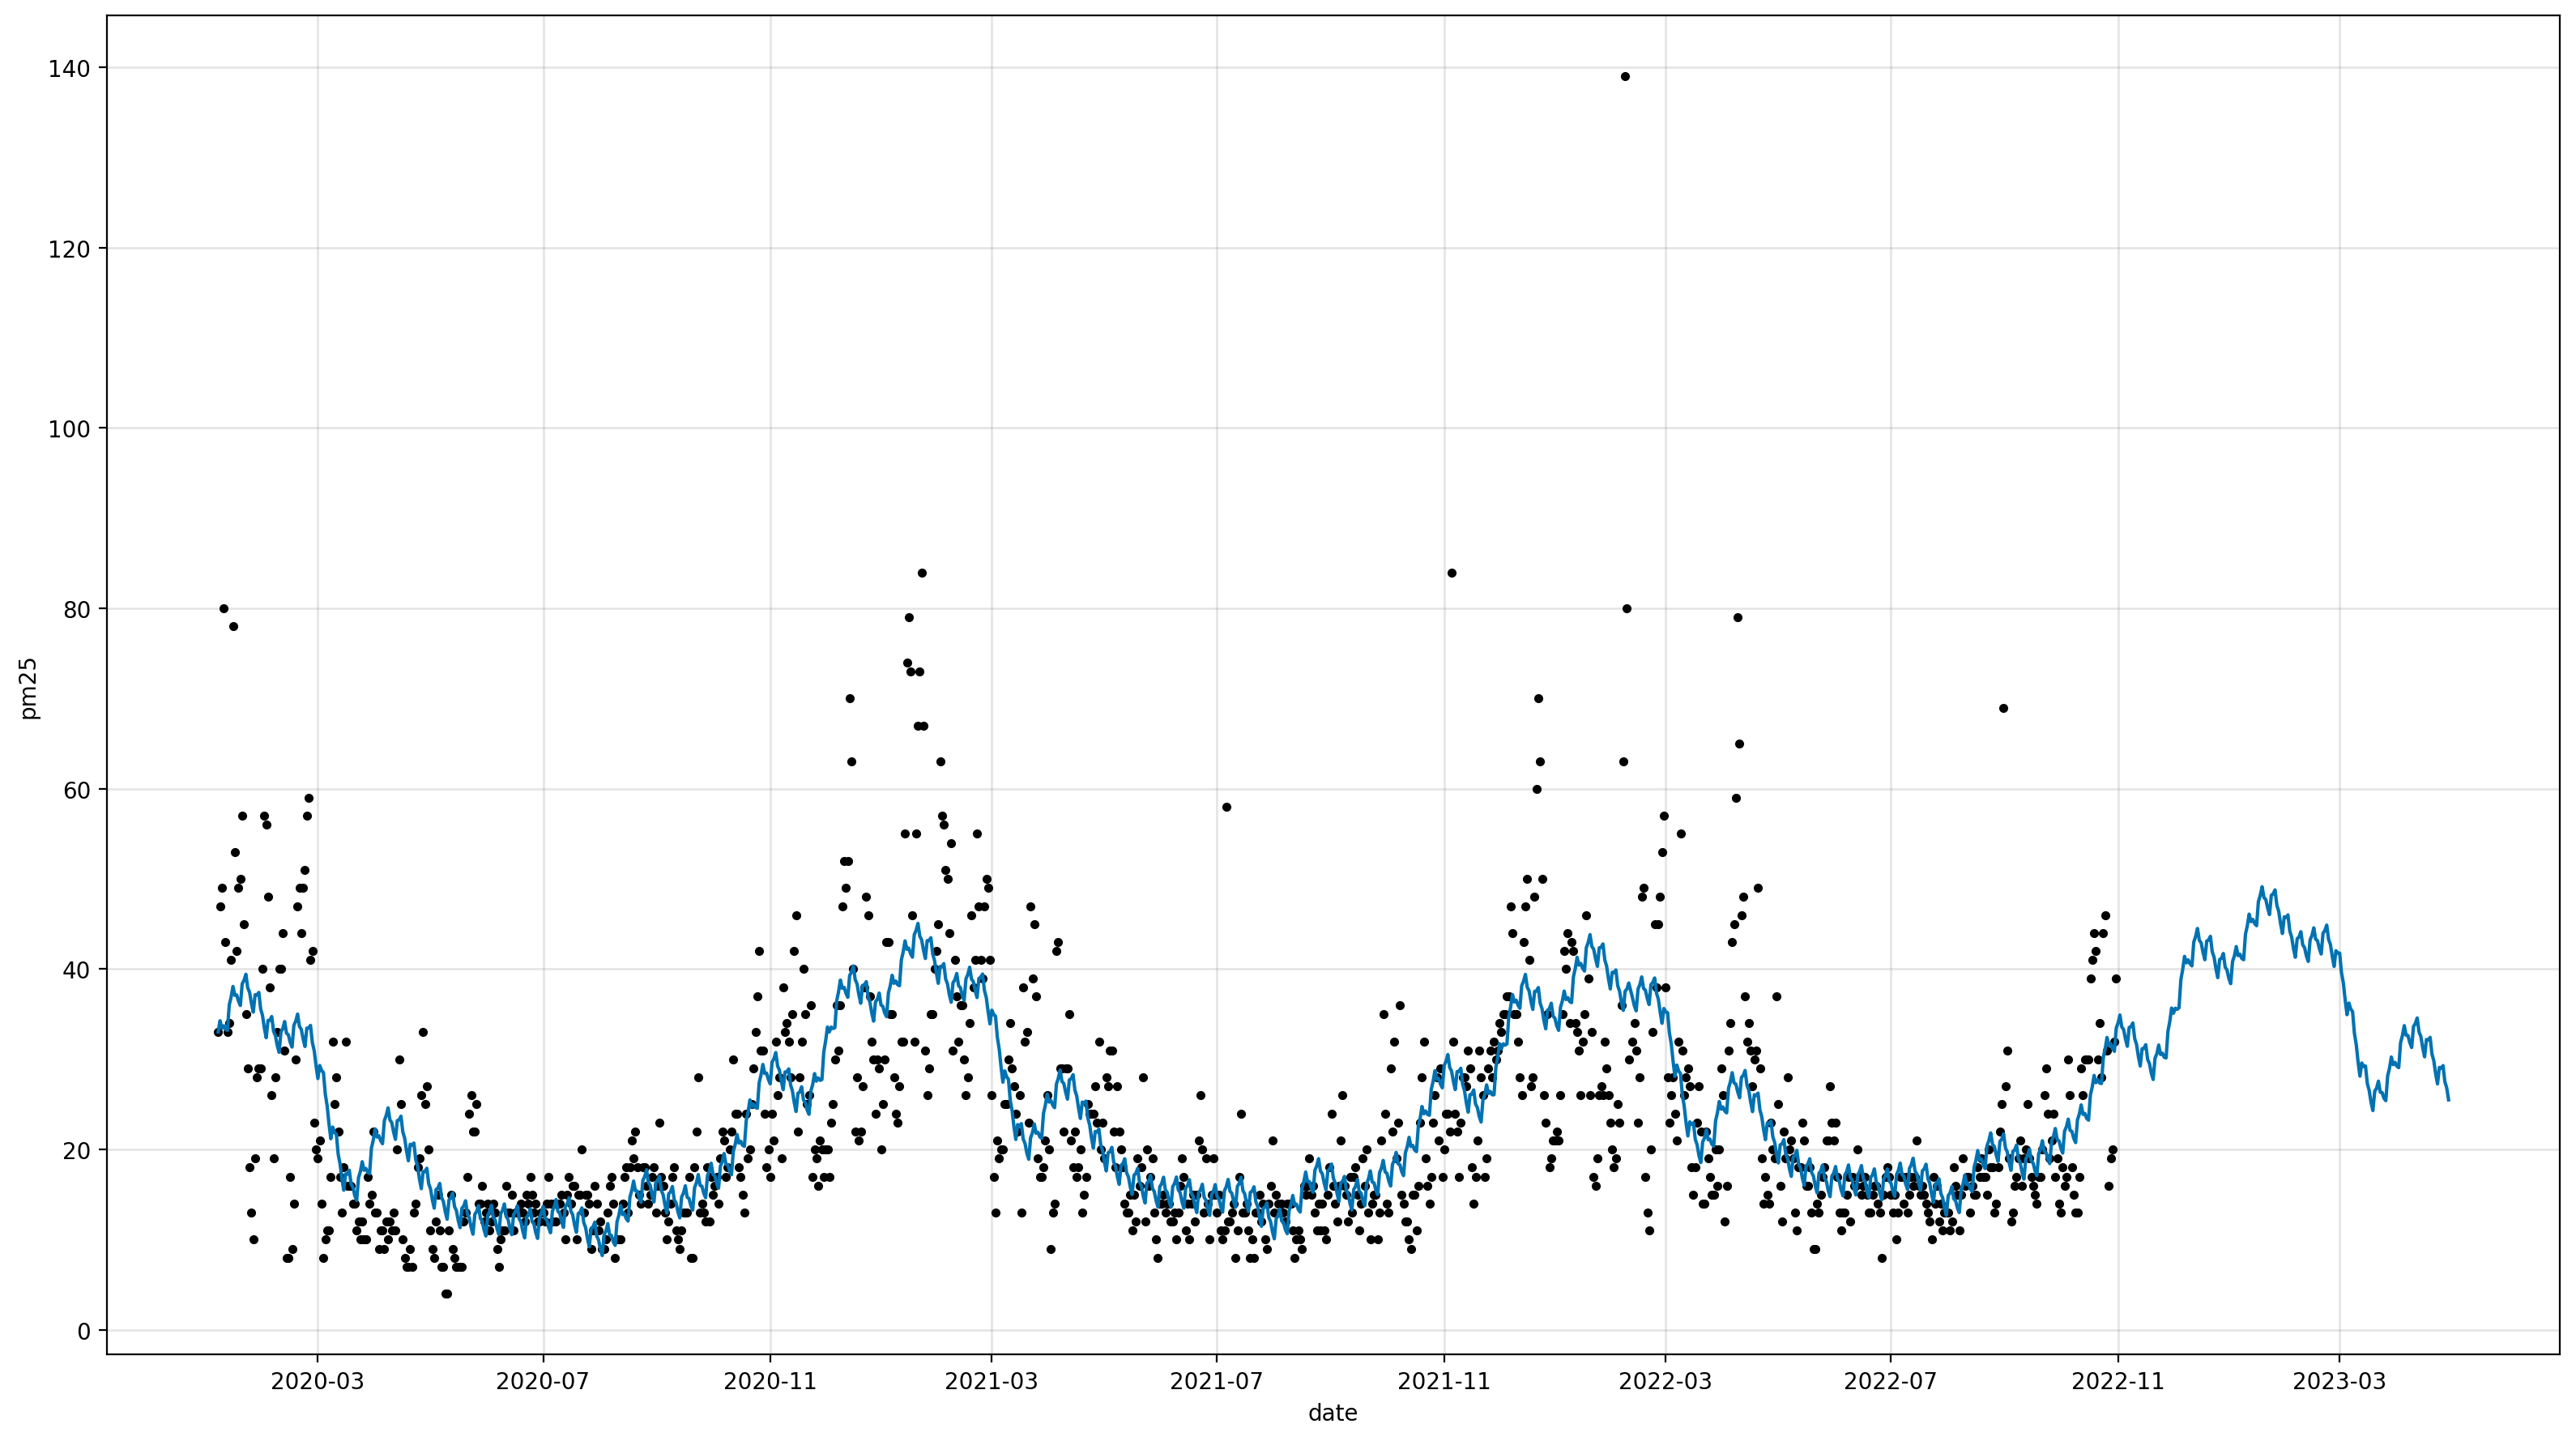

In [82]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [83]:
dfcstnew = forecast.tail(180)

In [84]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

ds       yhat
1028 2022-11-01  34.048623
1029 2022-11-02  34.909191
1030 2022-11-03  33.592823
1031 2022-11-04  33.302577
1032 2022-11-05  32.260270
...         ...        ...
1203 2023-04-25  29.014573
1204 2023-04-26  29.299521
1205 2023-04-27  27.503498
1206 2023-04-28  26.831552
1207 2023-04-29  25.504794

[180 rows x 2 columns]

In [85]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0)
ypred

ds  yhat
1028 2022-11-01  34.0
1029 2022-11-02  35.0
1030 2022-11-03  34.0
1031 2022-11-04  33.0
1032 2022-11-05  32.0
...         ...   ...
1203 2023-04-25  29.0
1204 2023-04-26  29.0
1205 2023-04-27  28.0
1206 2023-04-28  27.0
1207 2023-04-29  26.0

[180 rows x 2 columns]

In [86]:
ypred.mean().round(0)

yhat    37.0
dtype: float64

In [87]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [88]:
metric_df = forecast.set_index('ds')[['yhat']].join(df3.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [89]:
mse3 = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse3

100.29266155887744

In [90]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse3 = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse3) 
ans

10.014622387233452

In [91]:
#Xgboost

In [92]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [93]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
data = pd.read_csv('/content/drive/MyDrive/code/code/dindang/dataAir_dindang.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
data

date  pm10   co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   NaN  NaN    NaN   NaN    NaN   NaN  27.1     70   
1    2018-01-02   NaN  NaN    NaN   NaN    NaN   NaN  27.5     67   
2    2018-01-03   NaN  NaN    NaN   NaN    NaN   NaN  28.2     66   
3    2018-01-04   NaN  NaN    NaN   NaN    NaN   NaN  29.3     64   
4    2018-01-05   NaN  NaN    NaN   NaN    NaN   NaN  30.4     63   
...         ...   ...  ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27  46.0  0.5  25.33  20.4  45.73  16.0  28.5     79   
1761 2022-10-28  55.0  0.6  41.57  25.2  66.77  19.0  29.6     72   
1762 2022-10-29  57.0  0.5  21.73  24.7  46.45  20.0  29.5     62   
1763 2022-10-30  80.0  0.9  35.39  38.3  73.66  32.0  30.0     62   
1764 2022-10-31  80.0  0.7  17.77  34.1  51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1698 non-null   float64       
 2   co                1714 non-null   float64       
 3   no                1713 non-null   float64       
 4   no2               1713 non-null   float64       
 5   nox               1712 non-null   float64       
 6   pm25              1028 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


In [97]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

date  pm10   co     no   no2    nox  pm25  avgT  humid  \
0    2018-01-01   NaN  NaN    NaN   NaN    NaN   NaN  27.1     70   
1    2018-01-02   NaN  NaN    NaN   NaN    NaN   NaN  27.5     67   
2    2018-01-03   NaN  NaN    NaN   NaN    NaN   NaN  28.2     66   
3    2018-01-04   NaN  NaN    NaN   NaN    NaN   NaN  29.3     64   
4    2018-01-05   NaN  NaN    NaN   NaN    NaN   NaN  30.4     63   
...         ...   ...  ...    ...   ...    ...   ...   ...    ...   
1760 2022-10-27  46.0  0.5  25.33  20.4  45.73  16.0  28.5     79   
1761 2022-10-28  55.0  0.6  41.57  25.2  66.77  19.0  29.6     72   
1762 2022-10-29  57.0  0.5  21.73  24.7  46.45  20.0  29.5     62   
1763 2022-10-30  80.0  0.9  35.39  38.3  73.66  32.0  30.0     62   
1764 2022-10-31  80.0  0.7  17.77  34.1  51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1009.40    100.0      9.0  
1              1009.40    120.0      4.0  
2              1009.40     60.0      4.0  
3              1009.40    330.0      6.0  
4              1009.40      NaN      NaN  
...                ...      ...      ...  
1760           1009.24    120.0      9.0  
1761           1009.24    170.0      7.0  
1762           1009.24    120.0     13.0  
1763           1009.24    120.0     13.0  
1764           1009.24      NaN      NaN  

[1765 rows x 12 columns]

In [98]:
y_col='pm25'

In [99]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

date   pm10    co     no    no2     nox  pm25  avgT  humid  \
0    2020-01-07  140.0  1.09  21.66  34.04   55.70  33.0  30.8     63   
1    2020-01-08  118.0  0.93  26.20  31.36   57.55  47.0  30.5     69   
2    2020-01-09  137.0  1.37  73.71  42.93  116.34  49.0  30.8     68   
3    2020-01-10  183.0  1.45  57.53  55.32  112.85  80.0  30.6     69   
4    2020-01-11  123.0  0.67   6.79  26.72   33.51  43.0  29.8     80   
...         ...    ...   ...    ...    ...     ...   ...   ...    ...   
1023 2022-10-27   46.0  0.50  25.33  20.40   45.73  16.0  28.5     79   
1024 2022-10-28   55.0  0.60  41.57  25.20   66.77  19.0  29.6     72   
1025 2022-10-29   57.0  0.50  21.73  24.70   46.45  20.0  29.5     62   
1026 2022-10-30   80.0  0.90  35.39  38.30   73.66  32.0  30.0     62   
1027 2022-10-31   80.0  0.70  17.77  34.10   51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  
0              1011.12    110.0      6.0  
1              1011.12    120.0      9.0  
2              1011.12    240.0      8.0  
3              1011.12    120.0      8.0  
4              1011.12    160.0     14.0  
...                ...      ...      ...  
1023           1009.24    120.0      9.0  
1024           1009.24    170.0      7.0  
1025           1009.24    120.0     13.0  
1026           1009.24    120.0     13.0  
1027           1009.24      NaN      NaN  

[1028 rows x 12 columns]

In [100]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [101]:
date_parts(data)

In [102]:
data

date   pm10    co     no    no2     nox  pm25  avgT  humid  \
0    2020-01-07  140.0  1.09  21.66  34.04   55.70  33.0  30.8     63   
1    2020-01-08  118.0  0.93  26.20  31.36   57.55  47.0  30.5     69   
2    2020-01-09  137.0  1.37  73.71  42.93  116.34  49.0  30.8     68   
3    2020-01-10  183.0  1.45  57.53  55.32  112.85  80.0  30.6     69   
4    2020-01-11  123.0  0.67   6.79  26.72   33.51  43.0  29.8     80   
...         ...    ...   ...    ...    ...     ...   ...   ...    ...   
1023 2022-10-27   46.0  0.50  25.33  20.40   45.73  16.0  28.5     79   
1024 2022-10-28   55.0  0.60  41.57  25.20   66.77  19.0  29.6     72   
1025 2022-10-29   57.0  0.50  21.73  24.70   46.45  20.0  29.5     62   
1026 2022-10-30   80.0  0.90  35.39  38.30   73.66  32.0  30.0     62   
1027 2022-10-31   80.0  0.70  17.77  34.10   51.91  39.0   NaN     59   

      pressure-monthly  windDir  windSpd  year  month  day   day_name  
0              1011.12    110.0      6.0  2020      1    7    Tuesday  
1              1011.12    120.0      9.0  2020      1    8  Wednesday  
2              1011.12    240.0      8.0  2020      1    9   Thursday  
3              1011.12    120.0      8.0  2020      1   10     Friday  
4              1011.12    160.0     14.0  2020      1   11   Saturday  
...                ...      ...      ...   ...    ...  ...        ...  
1023           1009.24    120.0      9.0  2022     10   27   Thursday  
1024           1009.24    170.0      7.0  2022     10   28     Friday  
1025           1009.24    120.0     13.0  2022     10   29   Saturday  
1026           1009.24    120.0     13.0  2022     10   30     Sunday  
1027           1009.24      NaN      NaN  2022     10   31     Monday  

[1028 rows x 16 columns]

In [103]:
data.columns

Index(['date', 'pm10', 'co', 'no', 'no2', 'nox', 'pm25', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [104]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

date  year  month  day   day_name  pm25
0    2020-01-07  2020      1    7    Tuesday  33.0
1    2020-01-08  2020      1    8  Wednesday  47.0
2    2020-01-09  2020      1    9   Thursday  49.0
3    2020-01-10  2020      1   10     Friday  80.0
4    2020-01-11  2020      1   11   Saturday  43.0
...         ...   ...    ...  ...        ...   ...
1023 2022-10-27  2022     10   27   Thursday  16.0
1024 2022-10-28  2022     10   28     Friday  19.0
1025 2022-10-29  2022     10   29   Saturday  20.0
1026 2022-10-30  2022     10   30     Sunday  32.0
1027 2022-10-31  2022     10   31     Monday  39.0

[1028 rows x 6 columns]

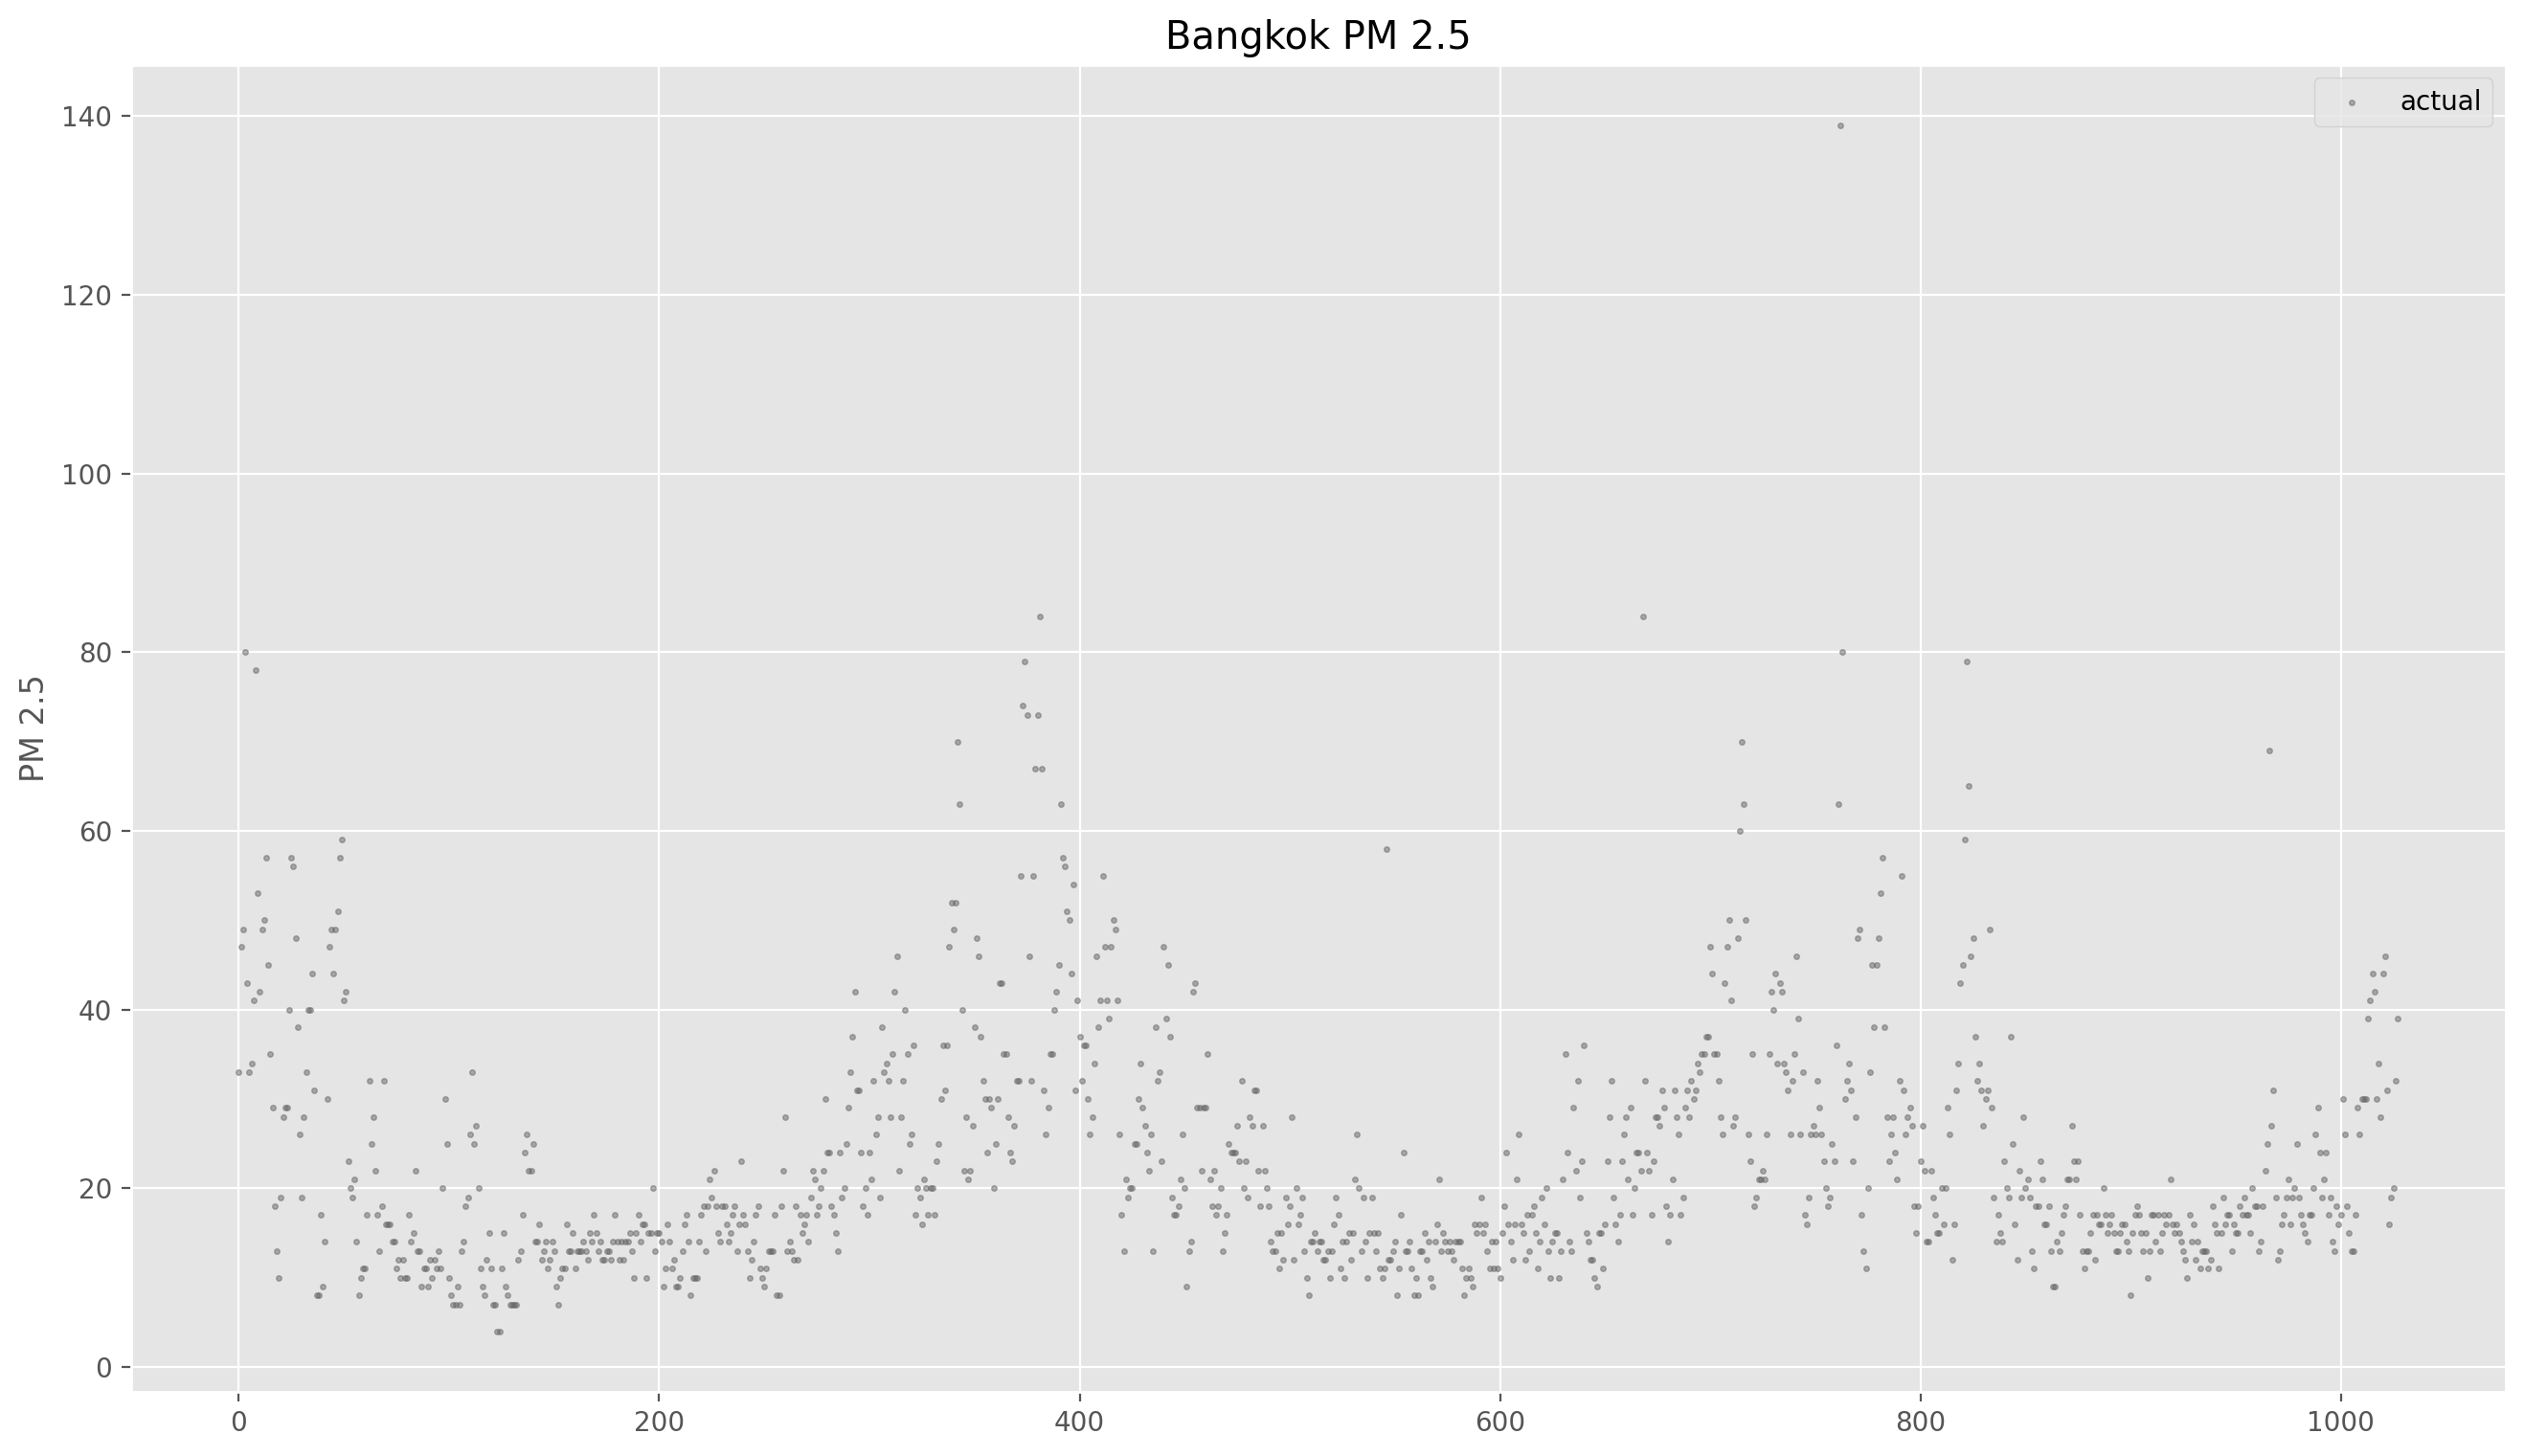

In [105]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [111]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [112]:
df=data.copy()
df['y']=df['pm25'].shift(-1)

In [113]:
train=df[:-900]
test=df[-900:]
test=test.drop(test.tail(1).index)

In [114]:
X_train1 = train['y'].values.reshape(-1,1)
y_test1 = test['pm25'].values.reshape(-1,1)
y_train1 = train['y'].values.reshape(-1,1)
X_test1 =test['pm25'].values.reshape(-1,1)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X=X_train1, y=y_train1.ravel())
reg_pred = reg.predict(X_test1)
test['gbr_pred'] = reg_pred
test

date  pm10   co     no    no2    nox  pm25  avgT  humid  \
128  2020-05-14  45.0  0.3  15.30  12.00  27.30   8.0  34.3     68   
129  2020-05-15  39.0  0.2  17.50  10.70  28.10   7.0  33.8     69   
130  2020-05-16  41.0  0.3  10.20   8.53  18.70   7.0  33.8     67   
131  2020-05-17  39.0  0.2   7.10   7.80  14.90   7.0  33.4     70   
132  2020-05-18  44.0  0.4  23.40  12.30  35.70   7.0  34.1     66   
...         ...   ...  ...    ...    ...    ...   ...   ...    ...   
1022 2022-10-26  84.0  0.9  35.98  40.60  76.59  31.0  30.3     69   
1023 2022-10-27  46.0  0.5  25.33  20.40  45.73  16.0  28.5     79   
1024 2022-10-28  55.0  0.6  41.57  25.20  66.77  19.0  29.6     72   
1025 2022-10-29  57.0  0.5  21.73  24.70  46.45  20.0  29.5     62   
1026 2022-10-30  80.0  0.9  35.39  38.30  73.66  32.0  30.0     62   

      pressure-monthly  windDir  windSpd  year  month  day   day_name     y  \
128            1007.07    180.0      8.0  2020      5   14   Thursday   7.0   
129            1007.07    250.0     12.0  2020      5   15     Friday   7.0   
130            1007.07    180.0     14.0  2020      5   16   Saturday   7.0   
131            1007.07    160.0      8.0  2020      5   17     Sunday   7.0   
132            1007.07    150.0      7.0  2020      5   18     Monday  12.0   
...                ...      ...      ...   ...    ...  ...        ...   ...   
1022           1009.24    110.0      7.0  2022     10   26  Wednesday  16.0   
1023           1009.24    120.0      9.0  2022     10   27   Thursday  19.0   
1024           1009.24    170.0      7.0  2022     10   28     Friday  20.0   
1025           1009.24    120.0     13.0  2022     10   29   Saturday  32.0   
1026           1009.24    120.0     13.0  2022     10   30     Sunday  39.0   

       gbr_pred  
128    8.001385  
129    7.002212  
130    7.002212  
131    7.002212  
132    7.002212  
...         ...  
1022  31.027772  
1023  16.000978  
1024  19.000025  
1025  19.999859  
1026  31.999522  

[899 rows x 18 columns]

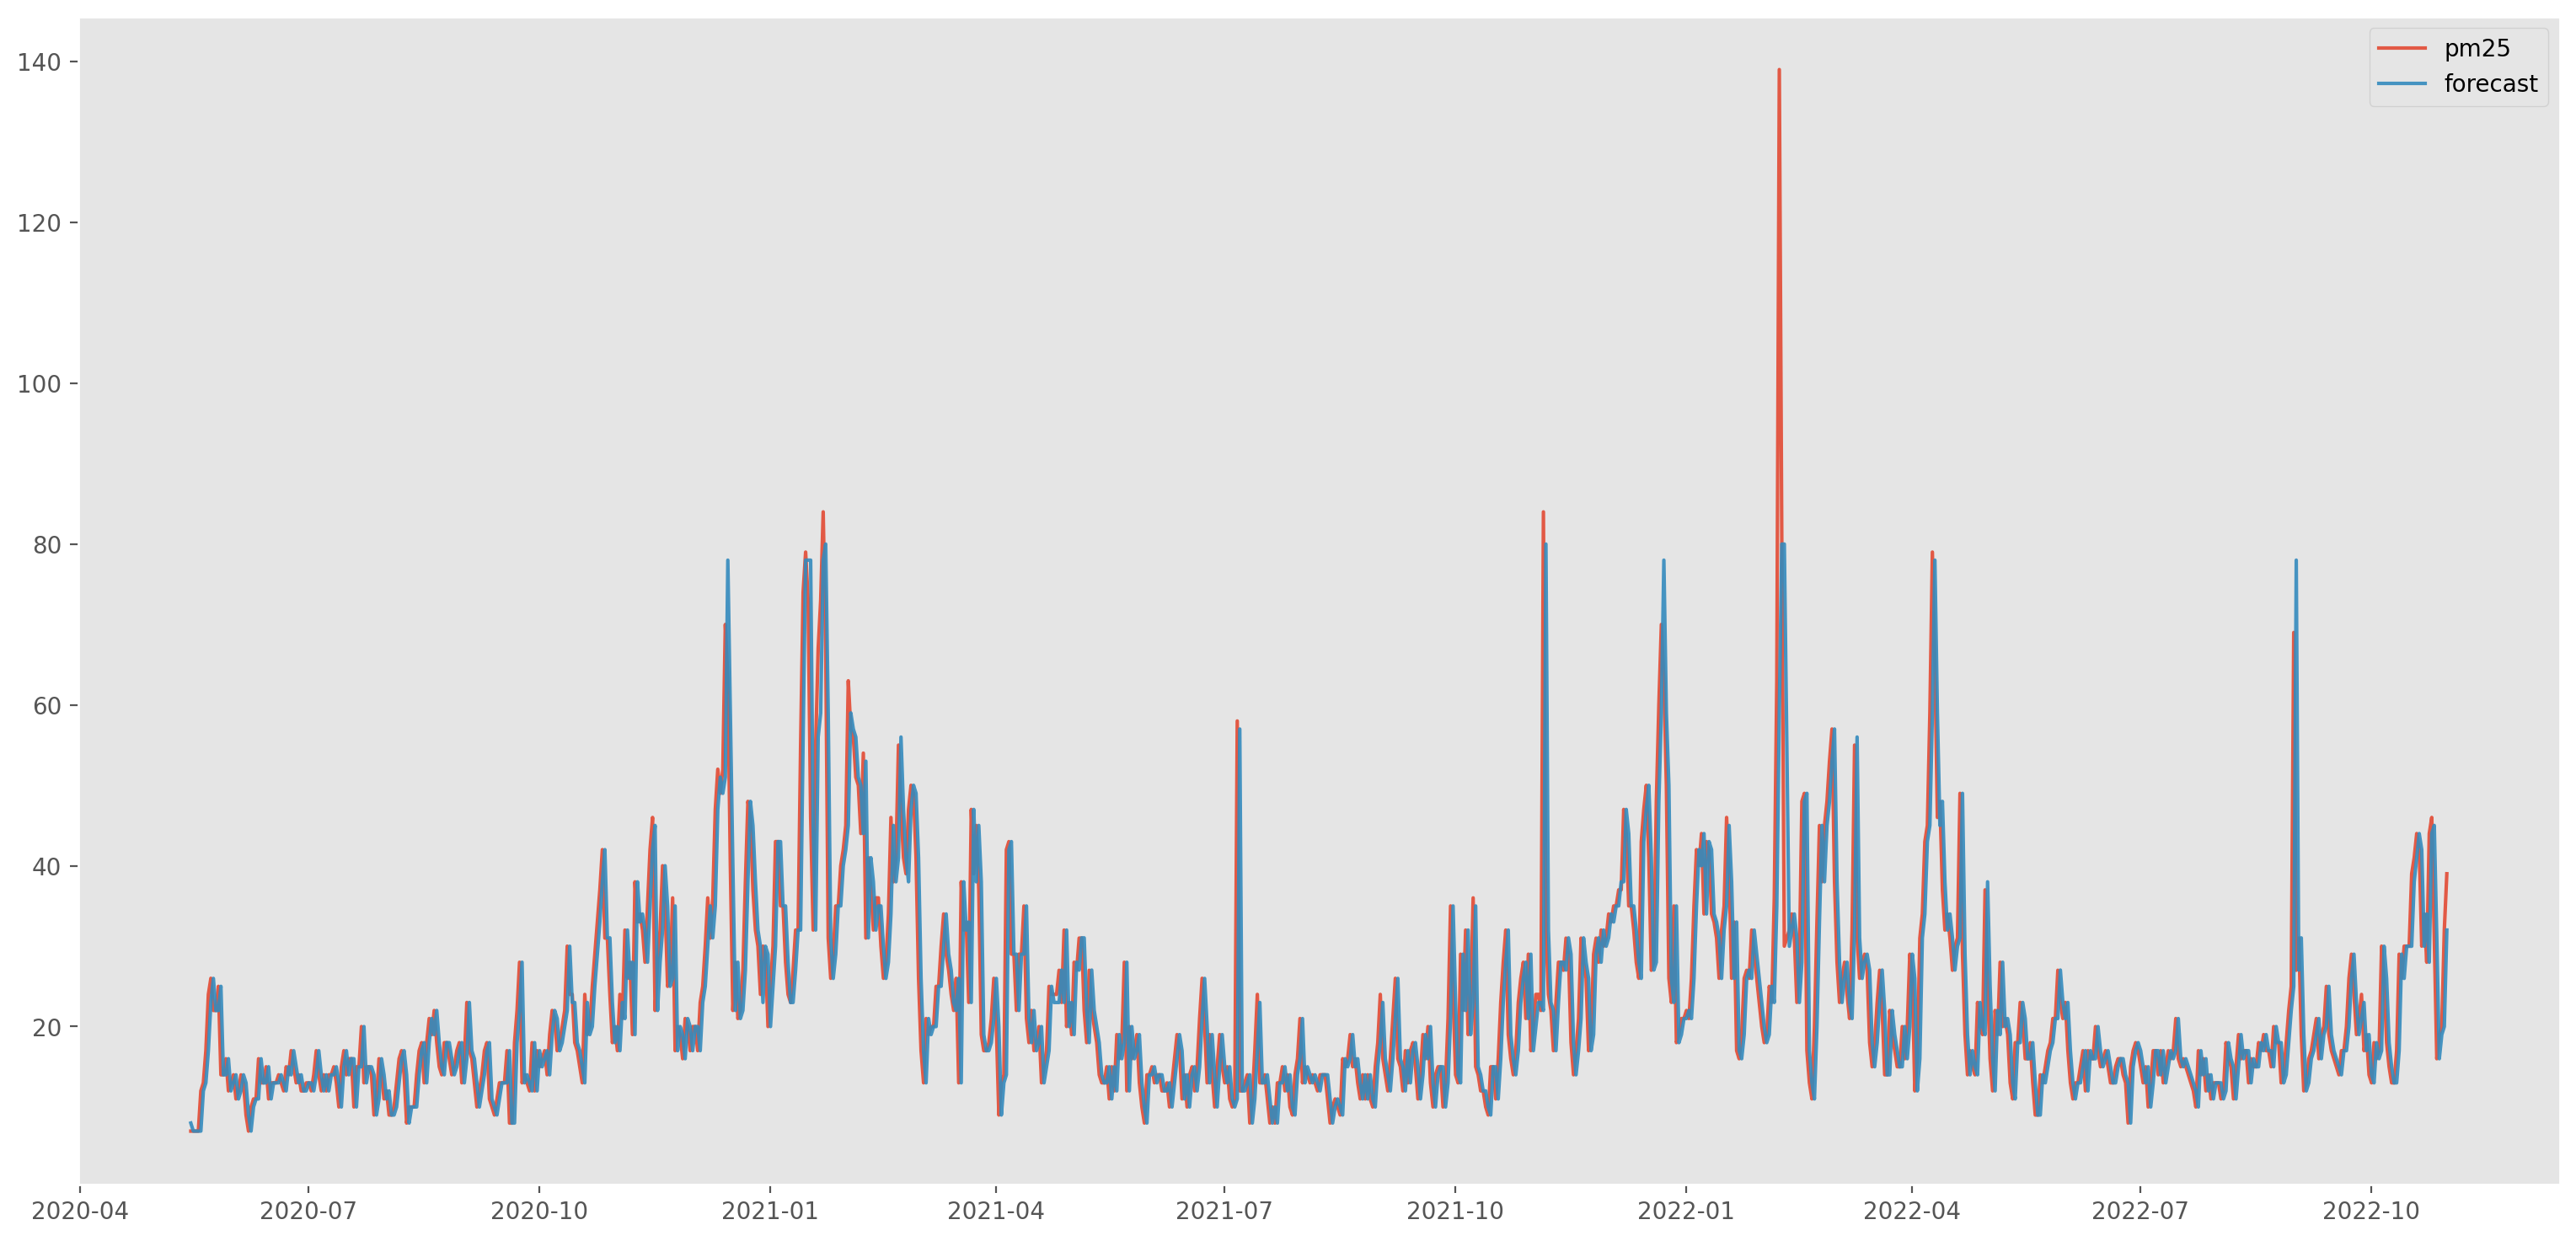

In [116]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

In [117]:
reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [118]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [119]:
reg.__dict__

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': 42,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'n_features_in_': 1,
 '_loss': <sklearn.ensemble._gb_losses.LeastSquaresError at 0x7f2db0a63cd0>,
 'max_features_': 1,
 'init_': DummyRegressor(),
 'estimators_': array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F2DAE5D8240)],
        [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                               random_state=RandomState(MT19937) at 0x7F2DAE5D8240)],
        [DecisionTreeRegressor(criterion='fried

In [120]:
yhat=[]
yhat = reg.predict(X_test1)

In [121]:
Y_Pred=reg.predict(X_test1)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(X_test1,Y_Pred)
print('Mse',mse)
rmse = np.sqrt(mse)
print('Rmse',rmse)

Mse 4.532577995799716
Rmse 2.1289852032834133


In [122]:
fig = plt.figure()      
ax = fig   

<Figure size 2000x1000 with 0 Axes>

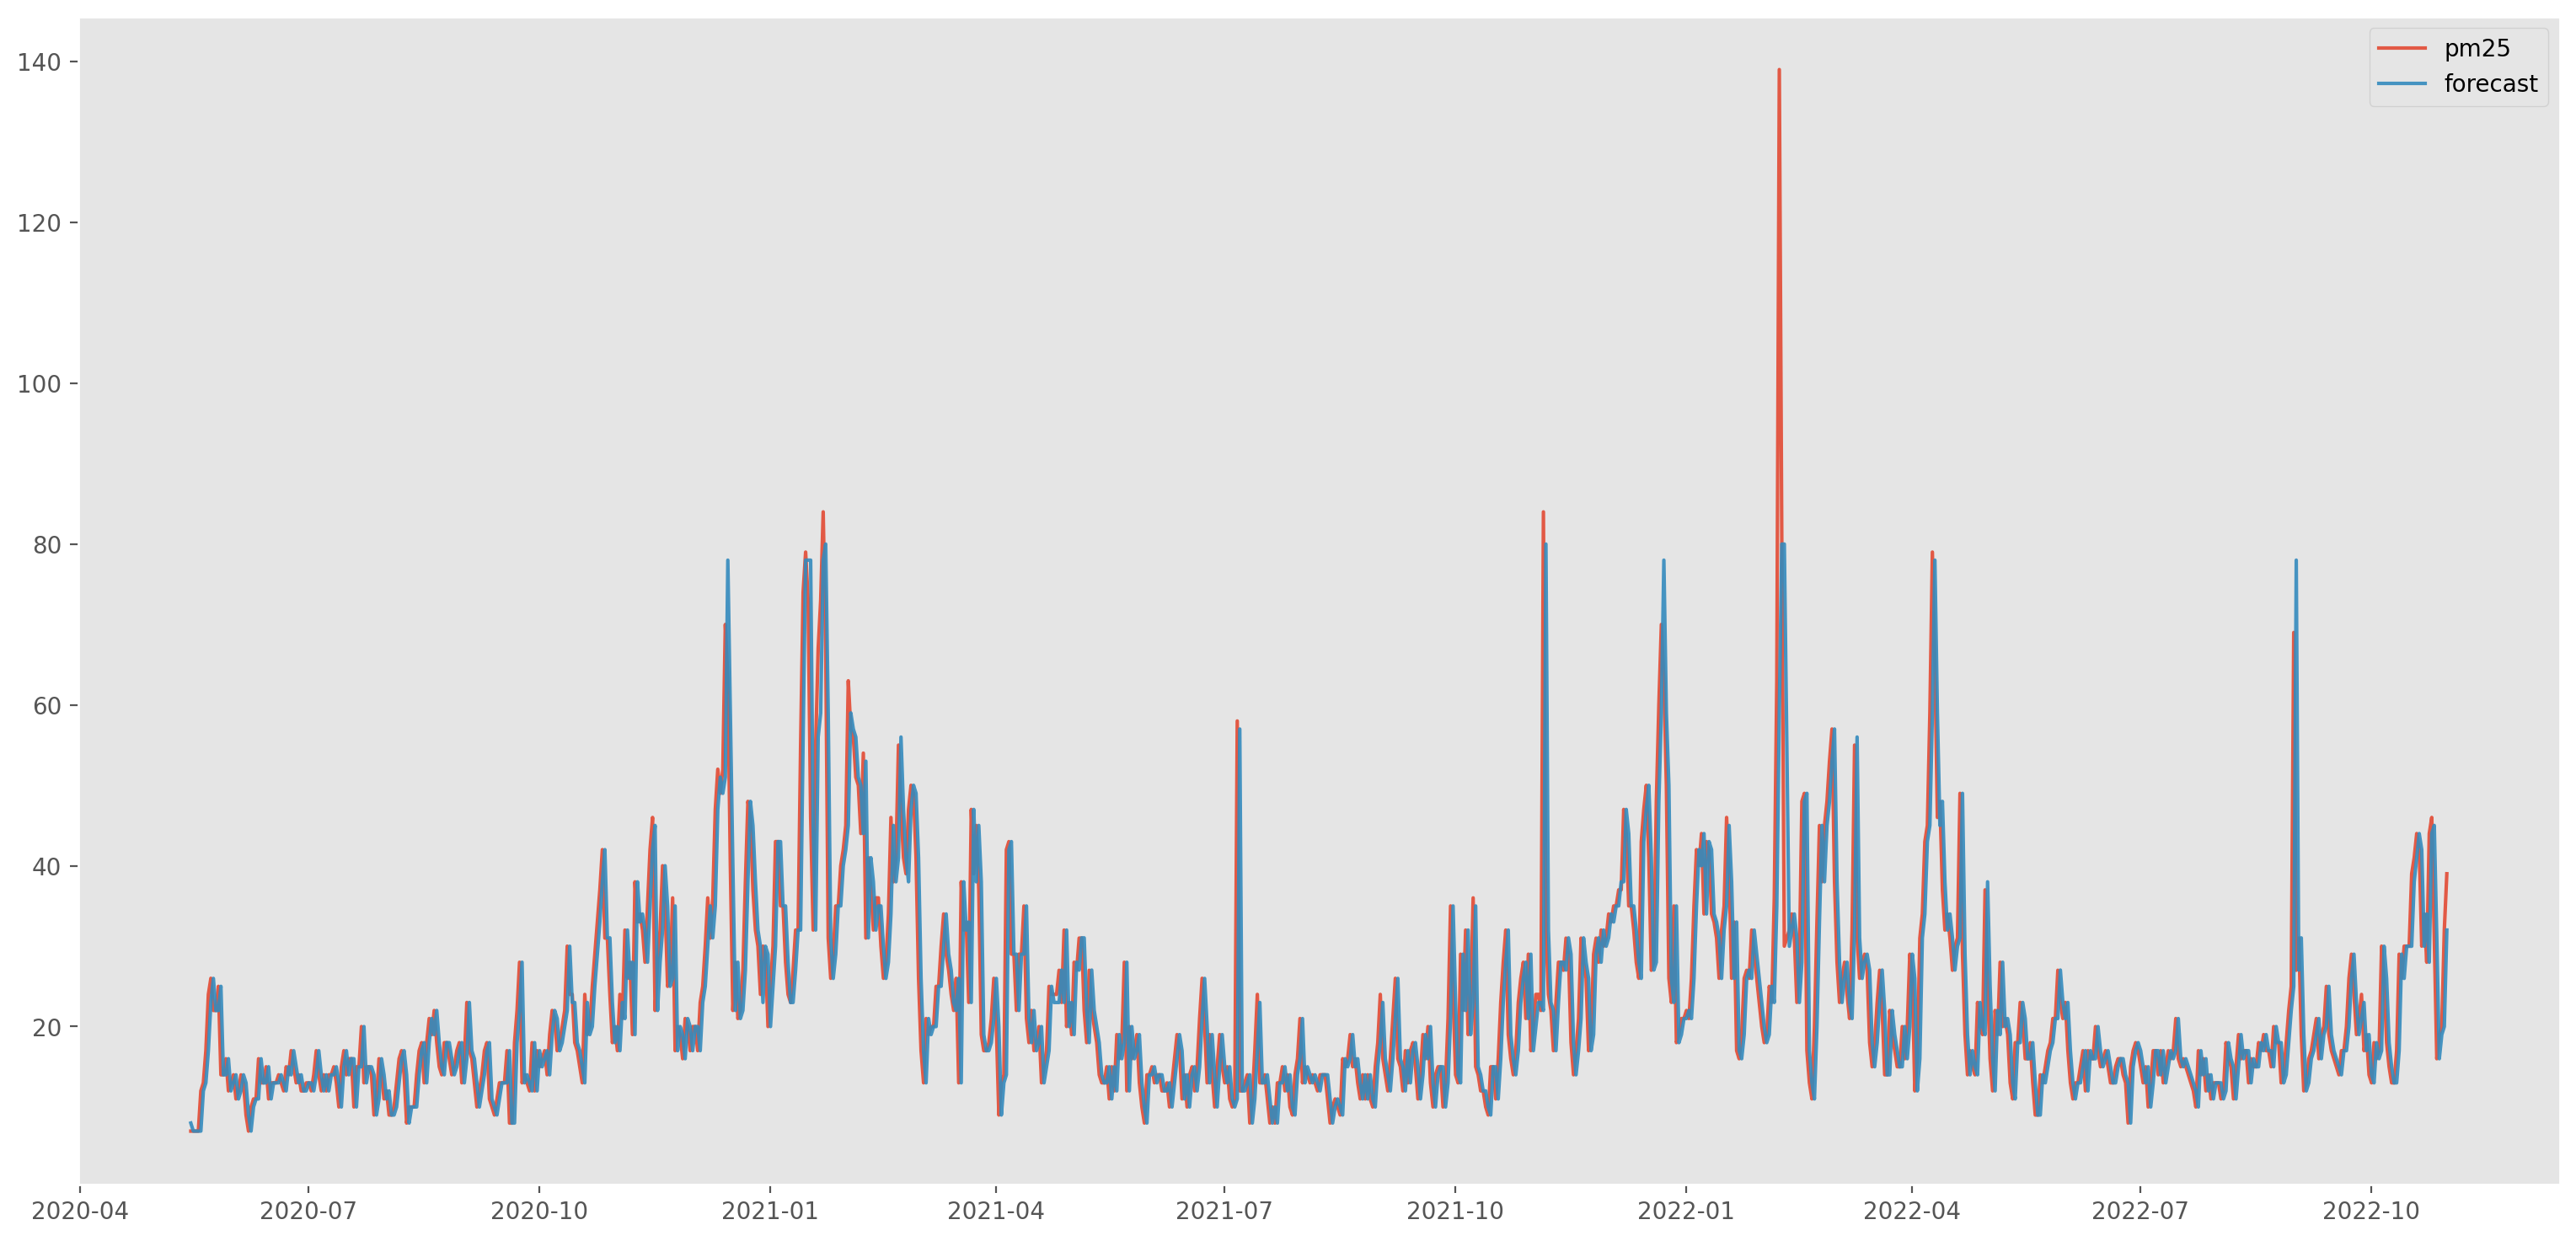

In [123]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test1)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(19, 9))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.9
    )
plt.legend()
plt.grid()
plt.show()

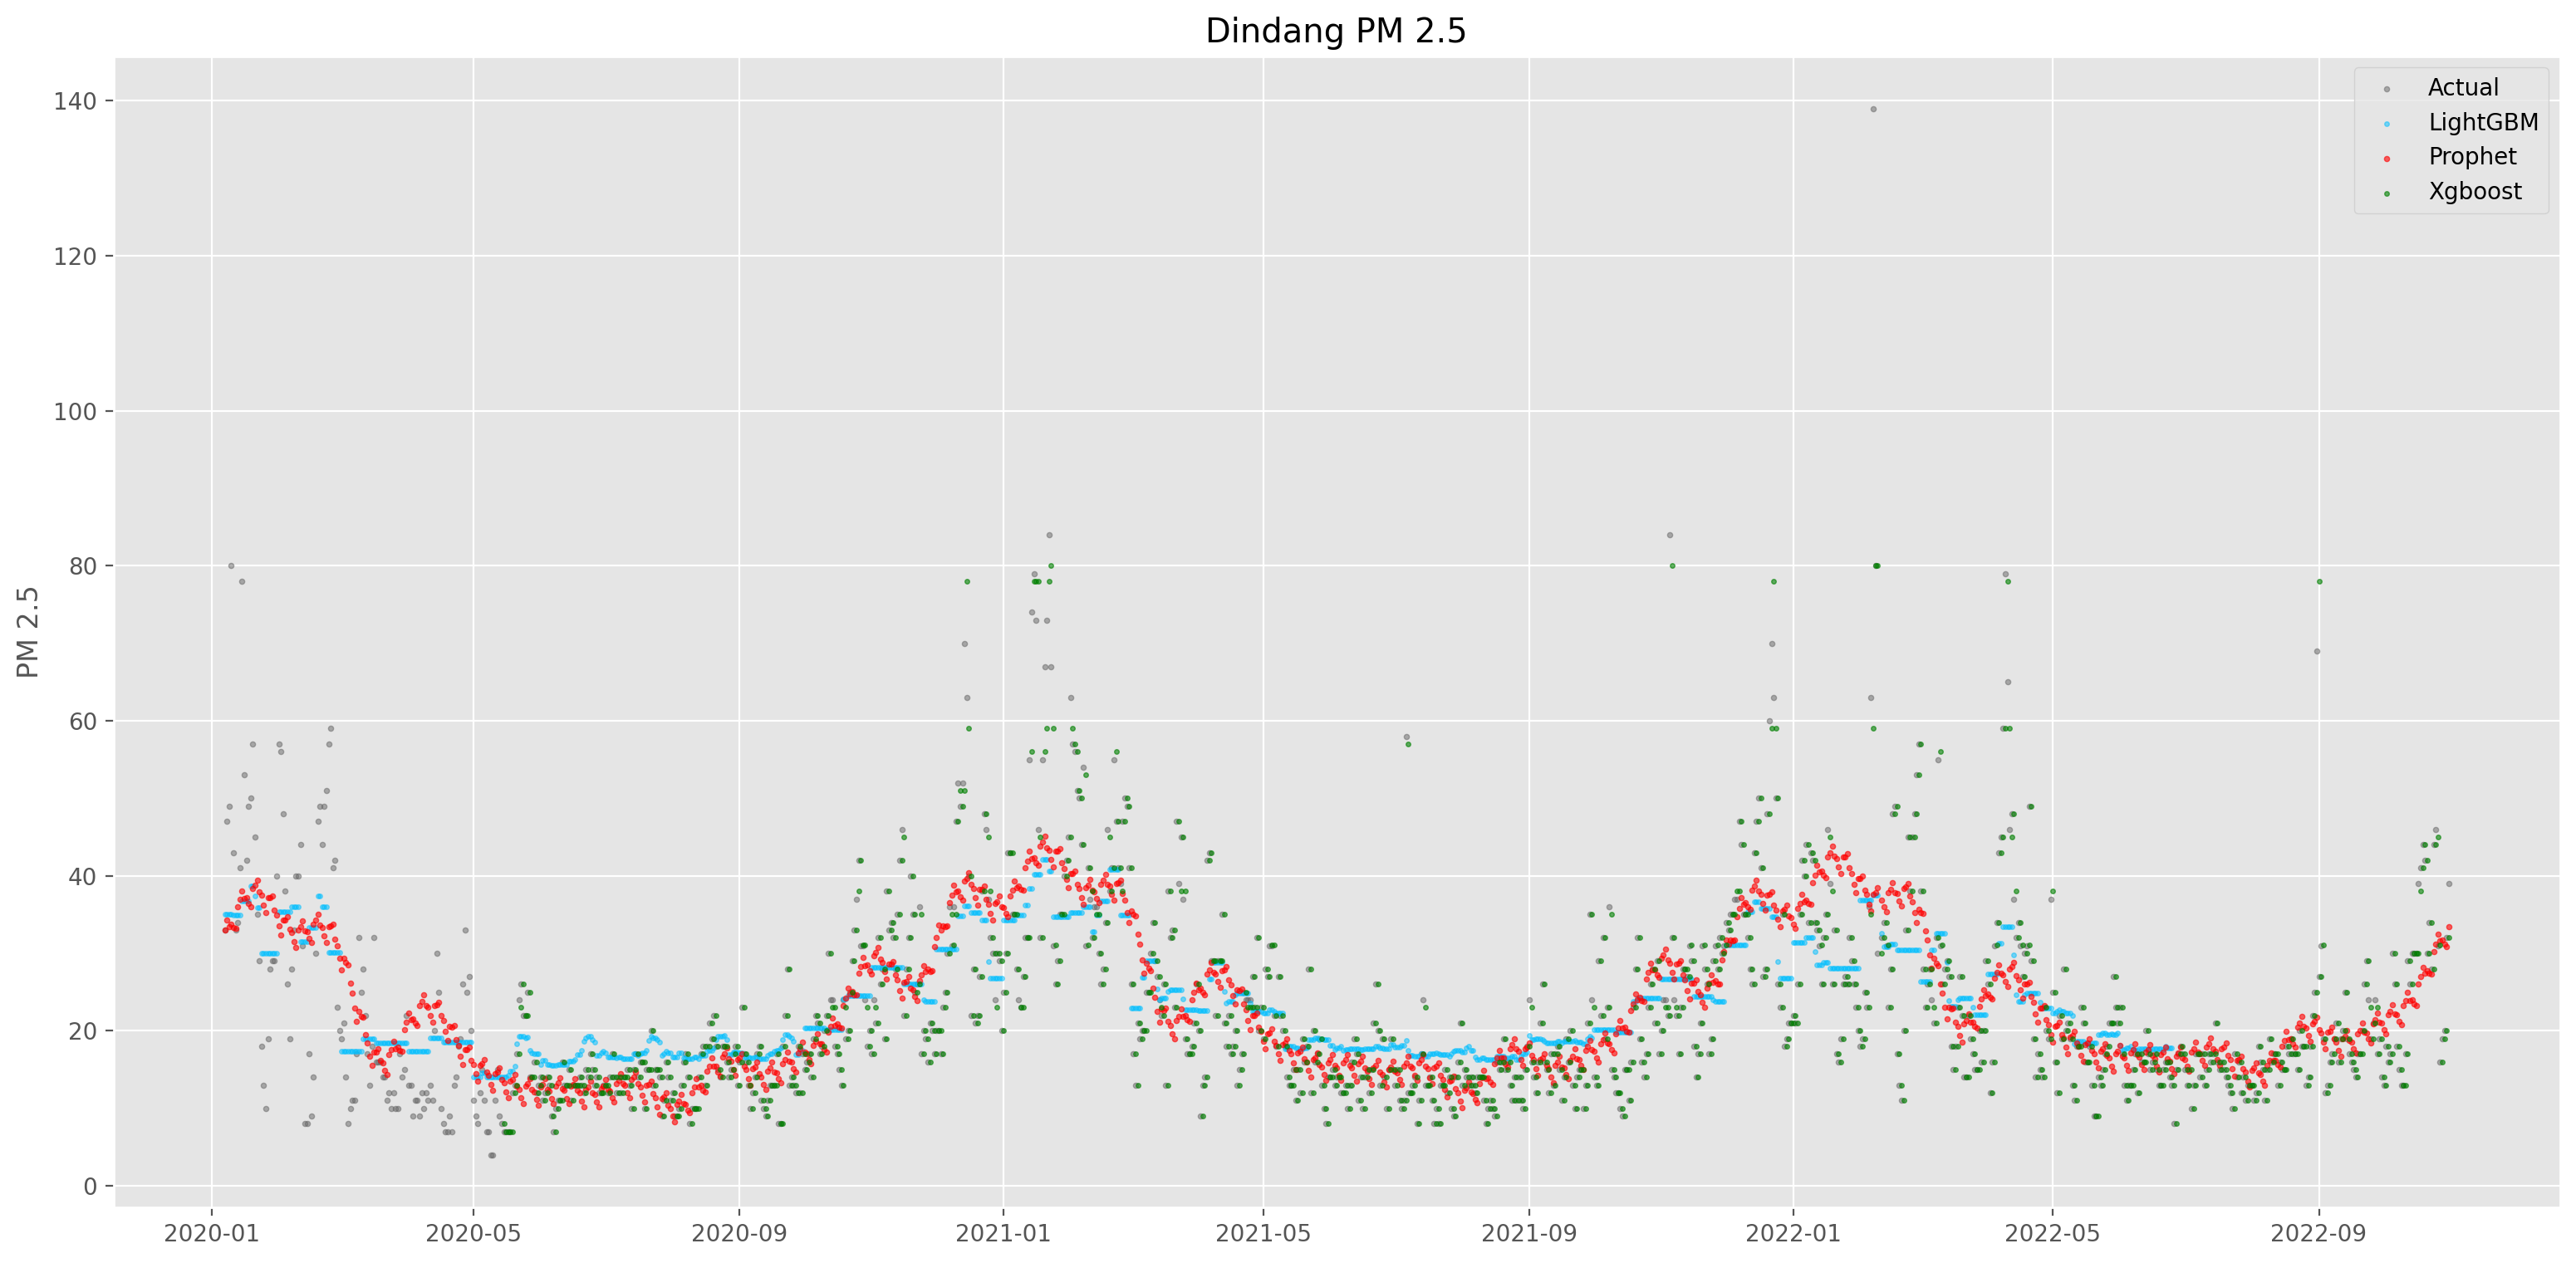

In [125]:
# กราฟ train LightGBM, Prophet, Xgboot
plt.figure(figsize=(19, 9))
plt.scatter(df1.index, df1[y_col], alpha=.5, label='Actual', s=5,color='.4')
plt.scatter(X_train.index, light_reg.predict(X_train), alpha=.5, s=4, label='LightGBM', color='deepskyblue')
plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='red')
plt.scatter('date',dtype,data=fc,alpha=.6,s=4,label='Xgboost', color='green')

plt.ylabel('PM 2.5')
plt.title('Dindang PM 2.5')
plt.legend();

#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange
#plt.scatter('date',dtype,data=fc,label='xgboost',alpha=.5 ,s=4,color='red')
#plt.scatter(dt['ds'], dt['yhat'], label='Prophet',s=5, alpha=.6,color='blue')
#-------------
#plt.scatter(train.index, reg.predict(X_train1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(test.index, reg.predict(X_test1), alpha=.5, s=4, label='Xgboost', color='green')
#plt.scatter(X_test.index, light_reg.predict(X_test), alpha=.5, s=4, label='LightGBM_test', color='orange')
